# Energydiscussion

1. Imports

2. Load Data

3. Load Model

4. Show Data

5. Evaluate on a Testset
    
    5.1 Confusion Matrix
    

6. Visualize
    
    6.1 Pion
    
    6.2 Kaon
    
    6.3 Neutron
    

# 1) Import

In [1]:

#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout,LeakyReLU, Activation,ZeroPadding2D, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Concatenate, Reshape, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import DivergingNorm
from matplotlib import ticker, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

from numpy import sqrt


if keras.backend.backend() == 'tensorflow':
    from keras import backend as K
    import tensorflow as tf
    from keras.utils.conv_utils import convert_kernel
    
    
########### Normalisieren ###########

#Ist schon normalisiert

Using TensorFlow backend.


# 2) Load Data

In [2]:

########### Daten laden ###########

#X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/X_Beamlike_RingCounting_PMTonly_WithTopBottom_110k.pickle","rb"))
#Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/Y_Beamlike_RingCounting_PMTonly_WithTopBottom_110k.pickle","rb"))


#X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/X_Beamlike_RingCounting_LAPPD1x1_ohneFiller_110k_Files_mitTopBottom.pickle","rb"))
#Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/Y_Beamlike_RingCounting_ohneFiller_LAPPD1x1_110k_Files_mitTopBottom.pickle","rb"))
#X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/X_Beamlike_RingCounting_PMTonly_110k.pickle","rb"))
#Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/Y_Beamlike_RingCounting_PMTonly_110k.pickle","rb"))

### LAPPD 10x10 + PMT
#X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/pickle/X_Beam_RC_70k_globalnorm_PMT_Norm_PMTandLAPPD10x10_110k_Files_mitTopBottom.pickle","rb"))
#Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/pickle/Y_Beam_RC_70k_globalnorm_PMT_Norm_PMTandLAPPD10x10_110k_Files_mitTopBottom.pickle","rb"))
###
### LAPPD 5x5 + PMT
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/pickle/X_Beam_RC_globalnorm_PMT_Norm_PMT160andLAPPD5x5_110k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/pickle/Y_Beam_RC_globalnorm_PMT_Norm_PMTandLAPPD5x5_110k_Files_mitTopBottom.pickle","rb"))
###

#X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/sicherung/pickle-Daten/Homogen/10x10 px Mittlere PMTs Charge/X.pickle","rb"))
#Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/sicherung/pickle-Daten/Homogen/10x10 px Mittlere PMTs Charge/Y.pickle","rb"))
#XVal= pickle.load(open("X_homogen_Validation.pickle","rb"))
#YVal= pickle.load(open("Y_homogen_Validation.pickle","rb"))




In [3]:
#X2= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/pickle/X_Beamlike_RC_PMT160andLAPPD5x5_110k_Files_mitTopBottom.pickle","rb"))


In [3]:
X.shape

(110441, 50, 120, 2)

# Load Model


In [3]:
model = tf.keras.models.load_model("Testmodel RC 5x5 0.83acc.model")

W0727 20:47:38.405561 14020 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0727 20:47:38.405561 14020 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0727 20:47:38.405561 14020 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared

# Feature Maps

In [4]:
feature_maps = model.predict(X[100000:])

# Norms

In [5]:
def sigmoid(x):

    return 1 / (1 + np.exp(-x))


print(sigmoid(0.5))

0.6224593312018546


In [6]:
def normX(x):
    
    return abs((x-min(feature_maps[:,0]))/(max(feature_maps[:,0])-min(feature_maps[:,0])))
def normY(x):
    
    return abs((x-min(feature_maps[:,1]))/(max(feature_maps[:,1])-min(feature_maps[:,1])))

#print(normX(min(feature_maps[:,0])),min(feature_maps[:,0]))

### Definition of Confuison Matrix

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Unique Counts

In [8]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print("How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of one kind: \n", 100/(counts[0]+counts[1])*counts[1])

How much from one kind, how much from the other: 
 [45672 64769]
How do they look like? 
 [[0 1]
 [1 0]]
Percentage of one kind: 
 58.64579277623346


# 4) Show Data

### Violett Background for Time

In [10]:

viridis = cm.get_cmap('magma_r', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0.28, 0, 0.28, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)


### Black Background for Time

In [11]:

viridis = cm.get_cmap('magma_r', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)

### Figur size

In [12]:
plt.rcParams['figure.figsize'] = [17/1.1, 9/1.1]

### Font size and options

In [13]:
# plt.rc('xtick', labelsize=10)
# plt.rc('ytick', labelsize=10)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }

# 7) Evaluate

In [14]:
X.shape

(110441, 50, 120, 2)

In [15]:
model = tf.keras.models.load_model("Testmodel RC 5x5 0.83acc.model")

In [16]:
score = model.evaluate(X[100000:], Y[100000:], verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.9783291017406848
Test accuracy:  0.8300929


## 7.1) Confusion matrix


A)

In [17]:
y = Y[100000:]

rounded_labels =np.argmax(y, axis=1)
y_prob = model.predict(X[100000:], batch_size=128, verbose=0)
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

    #print('Confusion Matrix: \n\n', tf.Tensor.eval(cm,feed_dict=None, session=None))

[[5706  399]
 [1375 2961]]


### Plot confusion Matrix

W0725 19:17:22.349436 20340 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
W0725 19:17:22.534452 20340 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


[[0.93464373 0.06535627]
 [0.31711255 0.68288745]]


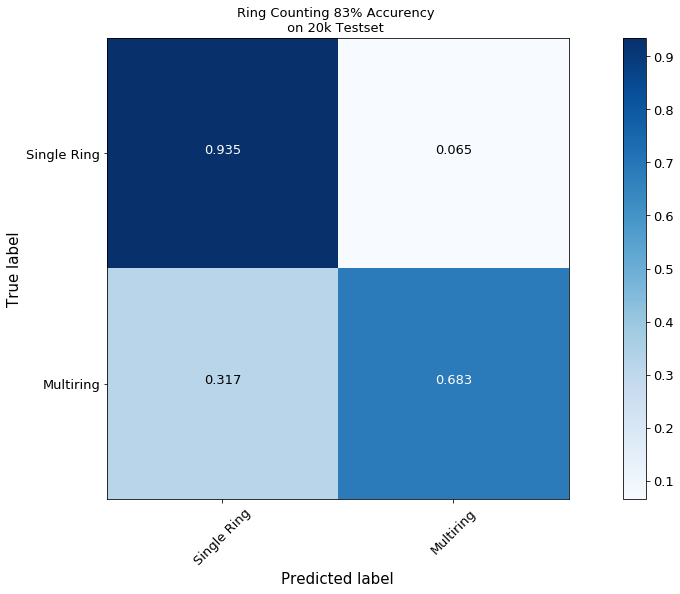

In [18]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["Single Ring", "Multiring"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Ring Counting 83% Accurency \n on 20k Testset  ')
#f.savefig("Confusion-CNN-81%-Ring Counting.png",format ="png", bbox_inches='tight')                    
#f.savefig("Confusion-CNN-81%-Ring Counting.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [60]:
plt.rcParams['figure.figsize'] = [17/1.8, 9/1.8]

In [8]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Ok, Beispiel Single Rings: 

Accuracy: ist wenn du dir _alle_ True Single Rings anschaust, und _dann_ berechnest wie viele davon _richtig_ als Single Ringe klassifiziert wurden

Purity ist wenn du dir alle *vorhergesagten* Single Ringe anschaust und ausrechnest, wie viele davon wirkliche Single Ringe waren

also einmal horizontal und einmal vertikal in der Confusion Matrix


Probability hab ich den Wert genannt, der bei dir aus dem vorletzten oder letzten Layer aus dem Netz kommt, also die Variable die schon von 0…1 geht und bei der wir die “schöne” Linie im 2D Plot gesehen hatte

In [630]:
100/(399+2961)*2961

88.125

In [629]:
100/(5706+1375)*5706


80.58183872334416

## Energy Graph

In [9]:
NeutrinoEnergy= np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyNeutrino.npy")
NeutronNumber= np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/NN.npy")
PionE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyPion.npy",allow_pickle=True)
MuonE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyMuon.npy",allow_pickle=True)
KaonE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyKaon.npy",allow_pickle=True)
EE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyElectron.npy",allow_pickle=True)
VisibleE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/VisibleEnergy.npy",allow_pickle=True)

In [24]:
for i in range(10):
    print(PionE[i])

['495.549']
['383.429']
0
0
['384.779']
0
0
0
['304.374']
0


# Electron Energy Distrubiton

In [10]:
ElectronEn=[]
MuonEn=[]

dummyindex=[] # For Pion Events interesting. Gets a 0 for zero Pions involeved and a 1 for else.
dummyindexMuon=[]
PionCounter=[]
Multiring_Counter =0

Pion_Counter =0
for event in range(len(feature_maps)):
    if Y[100000+event,1] > 0.5:
        MultiringPionEn=[]
MuonEn=[]

dummyindex=[] # For Pion Events interesting. Gets a 0 for zero Pions involeved and a 1 for else.
dummyindexMuon=[]
PionCounter=[]
Multiring_Counter =0

Pion_Counter =0
for event in range(len(feature_maps)):
    if Y[100000+event,1] > 0.5:
        Multiring_Counter = Multiring_Counter+1
        
    if PionE[100000+event] ==0:
        dummyindex.append(0)
        PionCounter.append(0)
        continue
    else:
        
        Pion_Counter = Pion_Counter+1
        dummyindex.append(1)
        if len(PionE[100000+event])==1:
            PionCounter.append(1)
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(PionE[100000+event])==2:
            PionCounter.append(2)
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(PionE[100000+event])==3:
            PionCounter.append(3)
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
PionEn=np.array(PionEn)



for event in range(len(feature_maps)):
    if MuonE[100000+event] ==0:
        dummyindexMuon.append(0)
        continue
    else:
        
        dummyindexMuon.append(4)
            
        if len(MuonE[100000+event])==1 and dummyindex[event]==1:
            dummyindexMuon.append(1)
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(MuonE[100000+event])==2 and dummyindex[event]==1:
            dummyindexMuon.append(2)
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],Y[100000+event,:]))
        if len(MuonE[100000+event])==2:
            dummyindexMuon.append(5)
        if len(MuonE[100000+event])==3:
            dummyindexMuon.append(6)
    
        if len(MuonE[100000+event])==3 and dummyindex[event]==1:
            dummyindexMuon.append(3)
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            MuonEn.append((float(MuonE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
MuonEn=np.array(MuonEn)

Multiring_Counter = Multiring_Counter+1    
    if PionE[100000+event] ==0:
        dummyindex.append(0)
        PionCounter.append(0)
        continue
    else:
        
        Pion_Counter = Pion_Counter+1
        dummyindex.append(1)
        if len(PionE[100000+event])==1:
            PionCounter.append(1)
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(PionE[100000+event])==2:
            PionCounter.append(2)
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(PionE[100000+event])==3:
            PionCounter.append(3)
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
PionEn=np.array(PionEn)

IndentationError: unexpected indent (<ipython-input-10-7bf1be2103a4>, line 77)

# Pion Energy Distrubution

In [27]:
len(dummyindex)

7476

In [11]:
PionEn=[]
MuonEn=[]

dummyindex=[] # For Pion Events interesting. Gets a 0 for zero Pions involeved and a 1 for else.
dummyindexMuon=[]
PionCounter=[]
Multiring_Counter =0

Pion_Counter =0
for event in range(len(feature_maps)):
    if Y[100000+event,1] > 0.5:
        Multiring_Counter = Multiring_Counter+1
        
    if PionE[100000+event] ==0:
        dummyindex.append(0)
        PionCounter.append(0)
        continue
    else:
        
        Pion_Counter = Pion_Counter+1
        dummyindex.append(1)
        if len(PionE[100000+event])==1:
            PionCounter.append(1)
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(PionE[100000+event])==2:
            PionCounter.append(2)
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(PionE[100000+event])==3:
            PionCounter.append(3)
            PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            PionEn.append((float(PionE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
PionEn=np.array(PionEn)



for event in range(len(feature_maps)):
    if MuonE[100000+event] ==0:
        dummyindexMuon.append(0)
        continue
    else:
        
        dummyindexMuon.append(4)
            
        if len(MuonE[100000+event])==1 and dummyindex[event]==1:
            dummyindexMuon.append(1)
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
        if len(MuonE[100000+event])==2 and dummyindex[event]==1:
            dummyindexMuon.append(2)
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],Y[100000+event,:]))
        if len(MuonE[100000+event])==2:
            dummyindexMuon.append(5)
        if len(MuonE[100000+event])==3:
            dummyindexMuon.append(6)
    
        if len(MuonE[100000+event])==3 and dummyindex[event]==1:
            dummyindexMuon.append(3)
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
            MuonEn.append((float(MuonE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
MuonEn=np.array(MuonEn)



In [12]:
unique, counts = np.unique(PionCounter, return_counts=True, axis=0)
uniqueM, countsM = np.unique(dummyindexMuon, return_counts=True, axis=0)

print(unique, counts)
print(uniqueM, countsM)

[0 1 2 3] [7476 2834  115   13]
[0 1 4] [  223  2852 10218]


In [25]:
10218+223

10441

In [26]:
print(len(MuonE))

110441


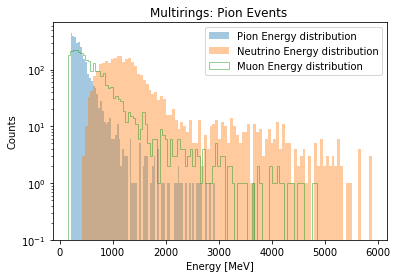

In [13]:
plt.hist(PionEn[:,0], bins=100, alpha=0.4,log=True, label='Pion Energy distribution')
plt.hist(PionEn[:,1], bins=100, alpha=0.4,log=True, label='Neutrino Energy distribution')
plt.hist(MuonEn[:,0], bins=100, alpha=0.5,log=True, label='Muon Energy distribution',histtype='step', stacked=True)
#plt.hist(PionEn[:,0]-130, bins=100,histtype='step', stacked=True, fill=False, alpha=0.5,log=True, label='Pion Energieverteilung')
#plt.hist(PionEn[:,3], bins=100, alpha=0.5,log=True, label='Multiring Wahrscheinlichkeit')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.title('Multirings: Pion Events ')
plt.show()

In [14]:
unique, counts = np.unique(PionCounter, return_counts=True, axis=0)
print("Pion Events: How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of Pion events vs total: \n", 100/(counts[0]+counts[1]+counts[2]+counts[3])*(counts[1]+counts[2]+counts[3]))
print("How many Multirings in this sample? ", Multiring_Counter)
print("How many Pionevents in this sample? ", Pion_Counter)
print("Percentage Pionevens vs Mutlirings: ", (100/Multiring_Counter)*Pion_Counter ) 

Pion Events: How much from one kind, how much from the other: 
 [7476 2834  115   13]
How do they look like? 
 [0 1 2 3]
Percentage of Pion events vs total: 
 28.377083732515807
How many Multirings in this sample?  4336
How many Pionevents in this sample?  2965
Percentage Pionevens vs Mutlirings:  68.3809963099631


## Pion Ruhemasse

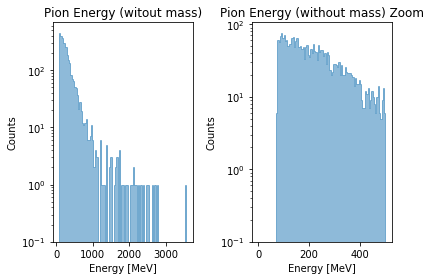

In [15]:
plt.subplot(1, 2, 1)
plt.hist(PionEn[:,0]-130, bins=100,histtype='step', stacked=True, fill=True, alpha=0.5,log=True, label='Pion Energieverteilung Minus Ruhemasse')
#pyplot.hist(PionEn[:,3], bins=100, alpha=0.5,log=True, label='Multiring Wahrscheinlichkeit')
#pyplot.legend(loc='upper right')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
plt.title('Pion Energy (witout mass)')

...

plt.subplot(1, 2, 2)
plt.hist(PionEn[:,0]-130, bins=100,histtype='step',range=(0,500), stacked=True, fill=True, alpha=0.5,log=True, label='Pion Energieverteilung Minus Ruhemasse')
#pyplot.hist(PionEn[:,3], bins=100, alpha=0.5,log=True, label='Multiring Wahrscheinlichkeit')
#pyplot.legend(loc='upper right')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
plt.title('Pion Energy (without mass) Zoom')

plt.tight_layout()
plt.show()

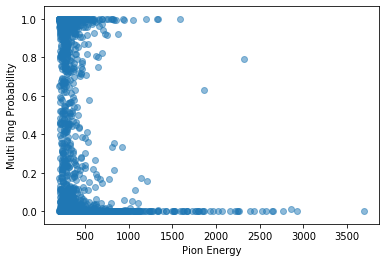

In [16]:
plt.scatter(PionEn[:,0],PionEn[:,2],  alpha=0.5)#
#ax.title('Single Ring Prediction vs Energy')
plt.ylabel('Multi Ring Probability')
plt.xlabel('Pion Energy')

plt.show()

In [17]:
NeutronNumberPion=[]
index=0

for event in dummyindex:
    if event==1:
        NeutronNumberPion.append(NeutronNumber[100000+index],Neutri)
        index=index+1  
    if len(PionE[100000+event])==1 and dummyindex[event]==1:
        NeutronNumberPion.append(NeutronNumber[100000+index])
    if len(PionE[100000+event])==2 and dummyindex[event]==1:
        NeutronNumberPion.append(NeutronNumber[100000+index])
    if len(PionE[100000+event])==3 and dummyindex[event]==1: 
        NeutronNumberPion.append(NeutronNumber[100000+index])
print(index)

TypeError: object of type 'int' has no len()

# Neutron Corelation to accurency Single Ring

In [18]:
###### SingleRinge
N0=[]
N1=[]
N2=[]
N3=[]
N4=[]
N5=[]
N6=[]
N7=[]
N8=[]
i0=0
i1=0
i2=0
i3=0
i4=0
i5=0
i6=0
i7=0
i8=0

for event in range(len(feature_maps)):
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==0 and feature_maps[event,0]>0.5:
        N0.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==0:
        i0=i0+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==1 and feature_maps[event,0]>0.5:
        N1.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==1:
        i1=i1+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==2 and feature_maps[event,0]>0.5:
        N2.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==2:
        i2=i2+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==3 and feature_maps[event,0]>0.5:
        N3.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==3:
        i3=i3+1

    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==4 and feature_maps[event,0]>0.5:
        N4.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==4:
        i4=i4+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==5 and feature_maps[event,0]>0.5:
        N5.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==5:
        i5=i5+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==6 and feature_maps[event,0]>0.5:
        N6.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==6:
        i6=i6+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==7 and feature_maps[event,0]>0.5:
        N7.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==7:
        i7=i7+1
        
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==8 and feature_maps[event,0]>0.5:
        N8.append((feature_maps[event,0],feature_maps[event,1]))
    if Y[100000+event,0] >0.5 and NeutronNumber[100000+event]==8:
        i8=i8+1
        
        
Neutron_AccSR=[len(N1)/i1,len(N2)/i2,len(N3)/i3,len(N4)/i4,len(N5)/i5,len(N6)/i6,len(N7)/i7,len(N8)/i8]
Neutron_AccSRError=(1/sqrt(i1),1/sqrt(i2),1/sqrt(i3),1/sqrt(i4),1/sqrt(i5),1/sqrt(i6),1/sqrt(i7),1/sqrt(i8))


###### Multiringe
N0=[]
N1=[]
N2=[]
N3=[]
N4=[]
N5=[]
N6=[]
N7=[]
N8=[]
i0=0
i1=0
i2=0
i3=0
i4=0
i5=0
i6=0
i7=0
i8=0
for event in range(len(feature_maps)):
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==0 and feature_maps[event,1]>0.5:
        N0.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==0:
        i0=i0+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==1 and feature_maps[event,1]>0.5:
        N1.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==1:
        i1=i1+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==2 and feature_maps[event,1]>0.5:
        N2.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==2:
        i2=i2+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==3 and feature_maps[event,1]>0.5:
        N3.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==3:
        i3=i3+1

    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==4 and feature_maps[event,1]>0.5:
        N4.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==4:
        i4=i4+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==5 and feature_maps[event,1]>0.5:
        N5.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==5:
        i5=i5+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==6 and feature_maps[event,1]>0.5:
        N6.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==6:
        i6=i6+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==7 and feature_maps[event,1]>0.5:
        N7.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==7:
        i7=i7+1
        
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==8 and feature_maps[event,1]>0.5:
        N8.append((feature_maps[event,1],feature_maps[event,1]))
    if Y[100000+event,1] >0.5 and NeutronNumber[100000+event]==8:
        i8=i8+1
        
        
Neutron_AccMR=[len(N1)/i1,len(N2)/i2,len(N3)/i3,len(N4)/i4,len(N5)/i5,len(N6)/i6,len(N7)/i7,len(N8)/i8]
Neutron_AccMRError=(1/sqrt(i1),1/sqrt(i2),1/sqrt(i3),1/sqrt(i4),1/sqrt(i5),1/sqrt(i6),1/sqrt(i7),1/sqrt(i8))       

In [50]:
Neutron_AccSR

[0.9248505550811272,
 0.8975069252077562,
 0.9224489795918367,
 0.9016393442622951,
 0.9029850746268657,
 0.89,
 0.8805970149253731,
 1.0]

In [51]:
print(len(N8),len(N7),len(N6),len(N5),len(N4))

15 30 45 61 74


In [52]:
print(Neutron_AccSRError[7], Neutron_AccSR[7], Neutron_AccSRError[7]*Neutron_AccSR[7])


1.0 1.0 1.0


In [60]:
len(Neutron_AccSR[:7])

7

In [53]:
errorSR=[]
errorMR=[]
for i in range(8):
    errorMR.append(Neutron_AccMRError[i]* Neutron_AccMR[i])
    errorSR.append(Neutron_AccSRError[i]* Neutron_AccSR[i])

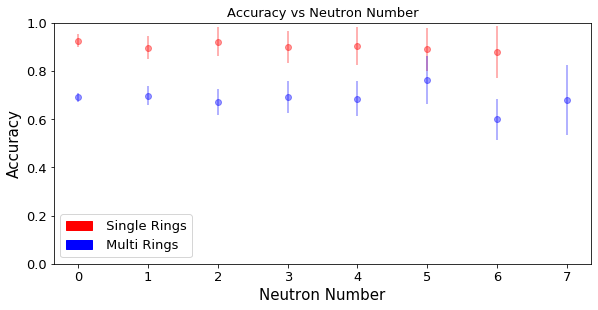

In [61]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
x=range(0,7)
x1=range(0,8)
plt.errorbar(x, Neutron_AccSR[:7],errorSR[:7],c='red', fmt='o',alpha=0.4,) 
plt.errorbar(x1, Neutron_AccMR,errorMR,c='blue', fmt='o',alpha=0.4)
plt.ylim(0, 1)
red_patch = mpatches.Patch(color='red', label=' Single Rings')
blue_patch = mpatches.Patch(color='blue', label=' Multi Rings')
plt.legend(handles=[red_patch, blue_patch],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Neutron Number') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs Neutron Number') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [84]:
unique, counts = np.unique(NeutronNumber, return_counts=True, axis=0)
print(unique, counts)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [64200 26663  7045  4229  3121  2288  1609  1024   258     4]


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as tick
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import seaborn as sns
import numpy as np

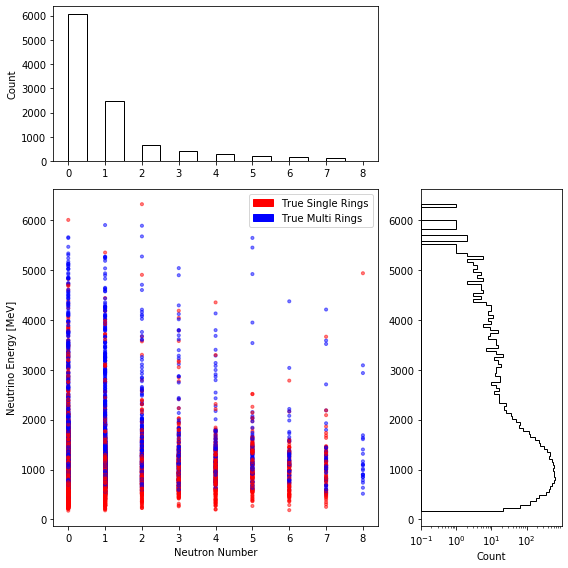

In [19]:
colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[100000:,0]]
area = np.pi*3
fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)


ax_main.scatter(NeutronNumber[100000:],NeutrinoEnergy[100000:],s=area, c=colors, alpha=0.5)#
ax_main.set(xlabel="Neutron Number", ylabel="Neutrino Energy [MeV]")
#ax.title('Single Ring Prediction vs Energy')


red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='upper right')


ax_xDist.hist(NeutronNumber[100000:] ,bins=16, align='mid', color='green',histtype='stepfilled',fill=False, log=False)
#ax_xDist.hist(y2,bins=10,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set_ylabel('Count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(NeutrinoEnergy[100000:],bins=100,orientation='horizontal',color='black', align='mid',fill=False,histtype='stepfilled',log=True )
#ax_yDist.hist(x2,bins=10,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='Count')


plt.tight_layout()
plt.show()

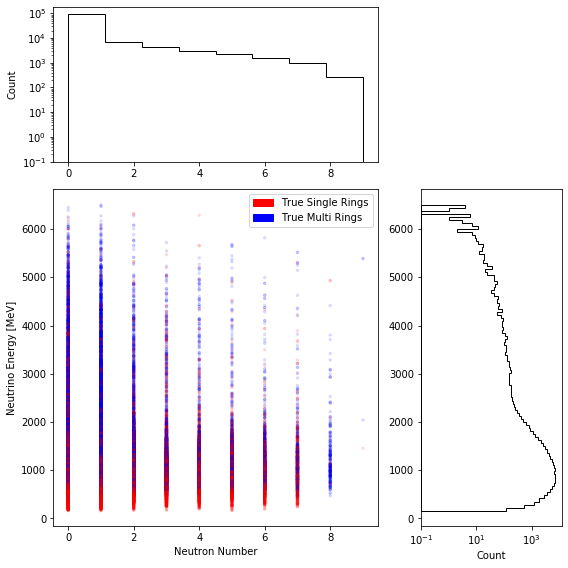

In [20]:
colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[:,0]]
area = np.pi*2
fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)


ax_main.scatter(NeutronNumber[:],NeutrinoEnergy[:],s=area, c=colors, alpha=0.1)#
ax_main.set(xlabel="Neutron Number", ylabel="Neutrino Energy [MeV]")
#ax.title('Single Ring Prediction vs Energy')


red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='upper right')


ax_xDist.hist(NeutronNumber[:] ,bins=8, align='mid', color='green',histtype='stepfilled',fill=False, log=True)
#ax_xDist.hist(y2,bins=10,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set(ylabel='Count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(NeutrinoEnergy[:],bins=100,orientation='horizontal',color='black', align='mid',fill=False,histtype='stepfilled',log=True )
#ax_yDist.hist(x2,bins=10,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='Count')


plt.tight_layout()
plt.show()

In [21]:
###### SingleRinge
ThreeDPlot=[]
for event in range(len(Y)):
    ThreeDPlot.append((NeutronNumber[event],0,NeutrinoEnergy[event],Y[event,0])) #All
    if Y[event,0] >0.5:
        ThreeDPlot.append((NeutronNumber[event],1,NeutrinoEnergy[event],Y[event,0])) #
    if Y[event,1] >0.5:
        ThreeDPlot.append((NeutronNumber[event],2,NeutrinoEnergy[event],Y[event,0]))
ThreeDPlot=np.array(ThreeDPlot)

In [40]:
ThreeDPlot[0,2]

1178.78

In [49]:
plt.rcParams['figure.figsize'] = [17, 12]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The `zmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: labelrotation


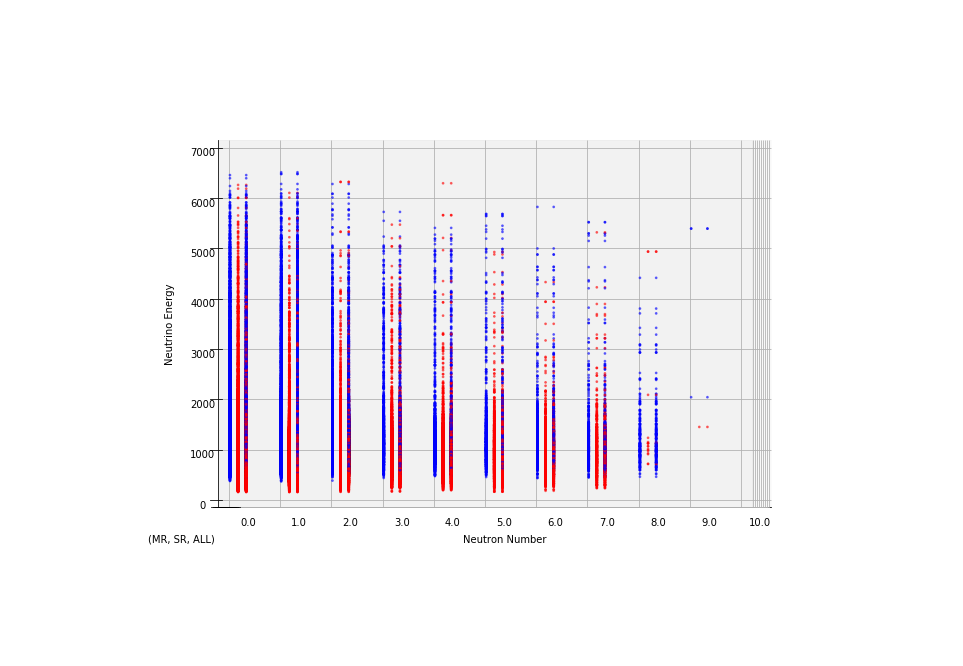

In [82]:



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',proj_type = 'ortho')

colors = y0colors = ['red' if value > 0.5 else 'blue' for value in ThreeDPlot[:,3]]#(0,0,0)
area = np.pi*1

# Plot
ax.scatter(ThreeDPlot[:,0],ThreeDPlot[:,1],ThreeDPlot[:,2],c=colors, 
           s=area,alpha=0.5)
             
           #
#ax.title('Single Ring Prediction vs Energy')
ax.set_xlabel('Neutron Number', labelpad=15)
ax.set_ylabel('(MR, SR, ALL)',labelpad=15)
ax.set_zlabel('Neutrino Energy',labelpad=15)
ax.set_xlim(0, 9,1)
ax.set_zlim(0, 7000)
ax.set_zlim3d(zmin=0)
ax.set_xlim3d(xmax =10)
plt.locator_params(axis='x', nbins=10,labelleft=35,labelrotation =40)

ax.view_init(0, -92)

a=ax.get_xticks().tolist()
ax.xaxis.set_ticklabels(a)
ax.yaxis.set_ticklabels([])
#ax.zaxis.set_ticklabels([])




plt.draw()

    
#plt.show()

In [66]:
###### SingleRinge
ThreeDPlot=[]
for event in range(len(Y)):
     #All
    if Y[event,0] >0.5:
        ThreeDPlot.append((NeutronNumber[event],NeutrinoEnergy[event], 0)) #
    if Y[event,1] >0.5:
        ThreeDPlot.append((NeutronNumber[event],NeutrinoEnergy[event],1))
ThreeDPlot=np.array(ThreeDPlot)

In [12]:
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [15]:
current_palette = sns.color_palette()
current_palette[1]= (1 ,0.5176470588235295, 0.3215686274509804)
print(current_palette[1] )

(1, 0.5176470588235295, 0.3215686274509804)


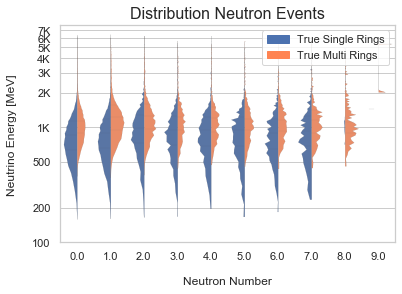

In [16]:

sns.set(style="whitegrid")

fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
ax.set(yscale="log")

# Create a regplot


# Show plot



ax = sns.violinplot(x=ThreeDPlot[:,0],y=ThreeDPlot[:,1],hue=ThreeDPlot[:,2],split=True,linewidth=0.1 ,cut=0,inner="quartile", palette=current_palette, 

                    scale="count", 

                    scale_hue=True, bw=.02, log=True)


#fig.set_yscale("log")

red_patch = mpatches.Patch(color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), label='True Single Rings')
blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Multi Rings')
ax.legend(handles=[red_patch, blue_patch],loc='upper right')
ax.set_xlabel('Neutron Number', labelpad=15)
ax.set_ylabel('Neutrino Energy [MeV] ', labelpad=15)
ax.set_title('Distribution Neutron Events', fontsize=16);
ax.set_yticks([100,200,500, 1000, 2000, 3000, 4000, 5000, 6000, 7000])
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))


In [36]:
plt.rcParams['figure.figsize'] = [17, 9]

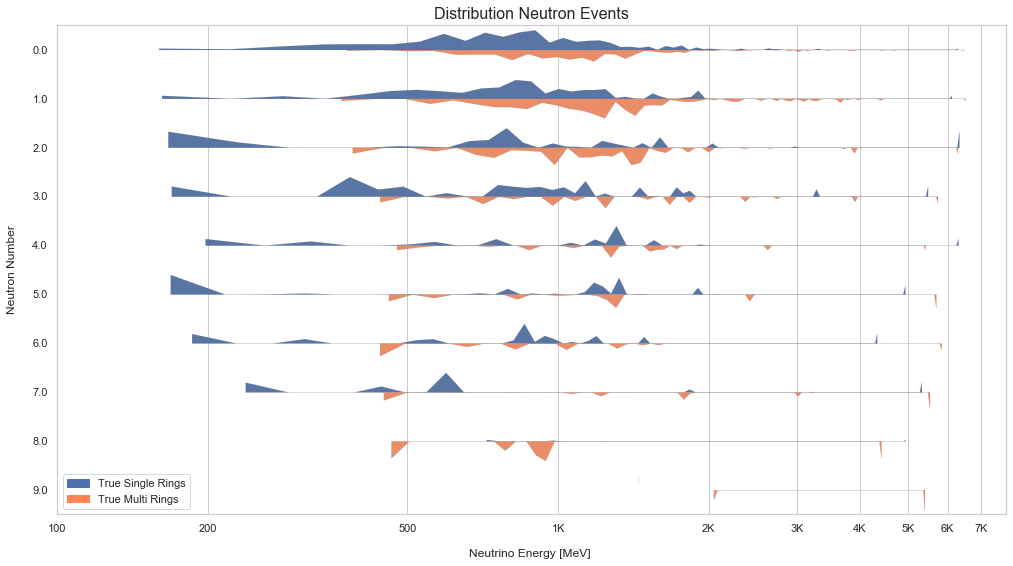

In [50]:

sns.set(style="whitegrid")

fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
ax.set(xscale="log")

# Create a regplot


# Show plot



ax = sns.violinplot(x=ThreeDPlot[:,1],y=ThreeDPlot[:,0],hue=ThreeDPlot[:,2],split=True,linewidth=0.1 ,cut=0,inner="quartile", palette=current_palette, 

                    scale="count", orient="h",

                    scale_hue=True, bw=.0002, log=True)


#fig.set_yscale("log")

red_patch = mpatches.Patch(color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), label='True Single Rings')
blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Multi Rings')
ax.legend(handles=[red_patch, blue_patch],loc='lower left')
ax.set_ylabel('Neutron Number', labelpad=15)
ax.set_xlabel('Neutrino Energy [MeV] ', labelpad=15)
ax.set_title('Distribution Neutron Events', fontsize=16);
ax.set_xticks([100,200,500, 1000, 2000, 3000, 4000, 5000, 6000, 7000])
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))


# Colormap 2 dim Neutron Numbers vs Single Ring & Multi Ring

In [ ]:
ThreeDPlot=[]
for event in range(len(Y)):
     #All
    if Y[event,0] >0.5:
        ThreeDPlot.append((NeutronNumber[event],NeutrinoEnergy[event], 0)) #
    if Y[event,1] >0.5:
        ThreeDPlot.append((NeutronNumber[event],NeutrinoEnergy[event],1))
ThreeDPlot=np.array(ThreeDPlot)

In [67]:
SingleRingNeutronlist=[]
MultiRingNeutronlist=[]
for event in range(len(ThreeDPlot)):
    if int(ThreeDPlot[event,2]) == 0:
        SingleRingNeutronlist.append(ThreeDPlot[event])
    else:
        MultiRingNeutronlist.append(ThreeDPlot[event])
SingleRingNeutronlist= np.array(SingleRingNeutronlist)
MultiRingNeutronlist= np.array(MultiRingNeutronlist)

In [69]:
import copy
data = np.arange(25).reshape((5,5))
my_cmap = copy.copy(plt.cm.get_cmap('viridis')) # copy the default cmap
my_cmap.set_bad((0,0,0))
# plt.imshow(data, 
#            norm=matplotlib.colors.LogNorm(), 
#            interpolation='nearest', 
#            cmap=my_cmap)

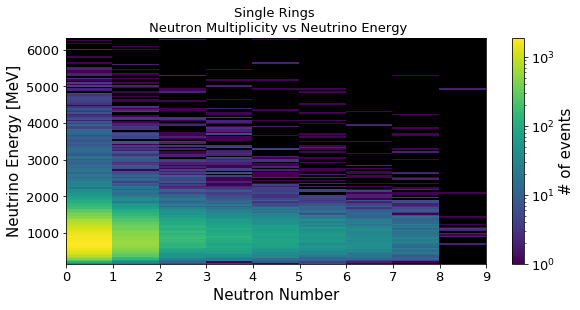

In [70]:
#(9,9)
plt.hist2d(SingleRingNeutronlist[:,0], SingleRingNeutronlist[:,1], bins=(9, 150), cmap=my_cmap, norm=colors.LogNorm())#,norm=DivergingNorm(1750))
cbar=plt.colorbar()
plt.title("Single Rings \n Neutron Multiplicity vs Neutrino Energy")
plt.ylabel("Neutrino Energy [MeV]")
plt.xlabel("Neutron Number")
cbar.set_label('# of events', rotation=90)

plt.tight_layout(h_pad=1)
plt.show()

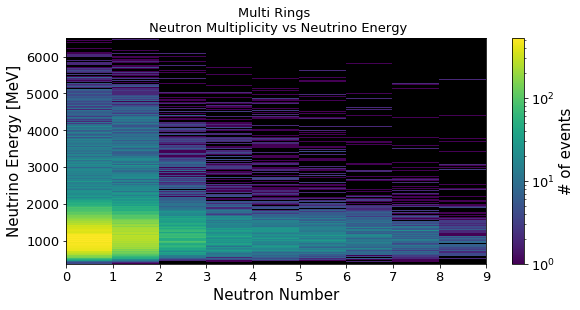

In [71]:
plt.hist2d(MultiRingNeutronlist[:,0], MultiRingNeutronlist[:,1], bins=(9, 300), cmap=my_cmap ,norm=colors.LogNorm())
cbar=plt.colorbar()
plt.title("Multi Rings \n Neutron Multiplicity vs Neutrino Energy")
plt.ylabel("Neutrino Energy [MeV]")
plt.xlabel("Neutron Number")
cbar.set_label('# of events', rotation=90)

plt.tight_layout(h_pad=1)
plt.show()

In [ ]:
plt.hist2d(MultiRingNeutronlist[:,0], MultiRingNeutronlist[:,1], bins=(9, 30), cmap=newcmp)
plt.show()

# visible energie vs neutron number

In [22]:
zipped = list(zip(VisibleE[:,0],NeutronNumber))
sort= sorted(zipped)
sort = np.array(sort)
binNeutronVisibleSR =[]
binNeutronVisibleMR =[]
duid2=duid1=index=0
duid2M=duid1M=indexM=0
binsize=1000
for i in range(0,110441):
    if Y[i,0] >0.5:
        duid1= duid1+sort[i,0]
        index = index+1 
        duid2= duid2+sort[i,1]
        if index ==binsize:
            binNeutronVisibleSR.append((duid1/binsize,duid2/binsize))
            duid2=duid1=index=0
    if Y[i,1] >0.5:
        duid1M= duid1M+sort[i,0]
        indexM = indexM+1 
        duid2M= duid2M+sort[i,1]
        if indexM ==binsize:
            binNeutronVisibleMR.append((duid1M/binsize, duid2M/binsize))
            duid2M=duid1M=indexM=0
binNeutronVisibleSR = np.array(binNeutronVisibleSR)
binNeutronVisibleMR = np.array(binNeutronVisibleMR)

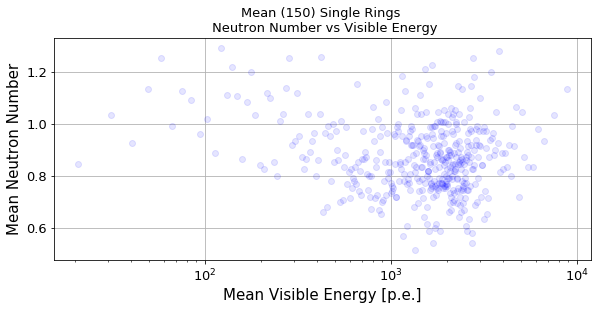

In [198]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
plt.plot(binNeutronVisibleSR[:,0],binNeutronVisibleSR[:,1],'bo',alpha=0.1 )

#plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Mean Visible Energy [p.e.]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean (150) Single Rings \n Neutron Number vs Visible Energy') 
plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

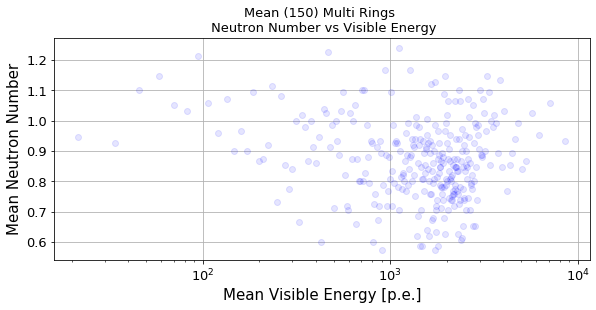

In [199]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
plt.plot(binNeutronVisibleMR[:,0],binNeutronVisibleMR[:,1],'bo',alpha=0.1 )

#plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Mean Visible Energy [p.e.]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean (150) Multi Rings \n Neutron Number vs Visible Energy') 
plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

## Errorbars

In [213]:
sortNeutronVisibleSR=[]
sortEnergyVisibleSR=[]
sortNeutronVisibleMR=[]
sortEnergyVisibleMR =[]
for i in range(len(sort)):
    if Y[i,0] >0.5:
        sortNeutronVisibleSR.append(sort[i,1])
        sortEnergyVisibleSR.append(sort[i,0])
    if Y[i,1] >0.5:
        sortNeutronVisibleMR.append(sort[i,1])
        sortEnergyVisibleMR.append(sort[i,0]) 

In [234]:
zipped = list(zip(VisibleE[:,0],NeutronNumber))
sort= sorted(zipped)
sort = np.array(sort)
binNeutronVisibleSR =[]
binNeutronVisibleMR =[]
duid2=duid1=index=0
duid2M=duid1M=indexM=0
binsize=2500
for i in range(0,110441):
    if Y[i,0] >0.5:
        duid1= duid1+sort[i,0]
        index = index+1 
        duid2= duid2+sort[i,1]
        if index ==binsize:
            binNeutronVisibleSR.append((duid1/binsize,duid2/binsize))
            duid2=duid1=index=0
    if Y[i,1] >0.5:
        duid1M= duid1M+sort[i,0]
        indexM = indexM+1 
        duid2M= duid2M+sort[i,1]
        if indexM ==binsize:
            binNeutronVisibleMR.append((duid1M/binsize, duid2M/binsize))
            duid2M=duid1M=indexM=0
binNeutronVisibleSR = np.array(binNeutronVisibleSR)
binNeutronVisibleMR = np.array(binNeutronVisibleMR)

In [259]:
binErrorNeutronVisibleSR =[]
binErrorEnergyVisibleSR = []
binErrorNeutronVisibleMR =[]
binErrorEnergyVisibleMR = []
errorvalueEnSR=0
errorvalueNnSR=0
errorvalueEnMR=0
errorvalueNnMR=0
index=indexM=0
index3=index4=0
binsize=2500

for i in range(len(sortEnergyVisibleSR)):
    try:
        errorvalueEnSR = errorvalueEnSR + (sortEnergyVisibleSR[i]-binNeutronVisibleSR[index3,0])**2
        errorvalueNnSR = errorvalueNnSR + (sortNeutronVisibleSR[i]-binNeutronVisibleSR[index3,1])**2
        index = index+1 

        if index ==binsize:
            binErrorNeutronVisibleSR.append(np.sqrt(errorvalueNnSR/binsize)*(1/np.sqrt(binsize)))
            binErrorEnergyVisibleSR.append(np.sqrt(errorvalueEnSR/binsize)*(1/np.sqrt(binsize)))
            index=errorvalueEnSR=errorvalueNnSR=0
            index3=index3+1
    except IndexError:
        break
for i in range(len(sortEnergyVisibleMR)):
    try:
        errorvalueEnMR = errorvalueEnMR + (sortEnergyVisibleMR[i]- binNeutronVisibleMR[index4,0])**2
        errorvalueNnMR = errorvalueNnMR + (sortNeutronVisibleMR[i]-binNeutronVisibleMR[index4,1])**2
        indexM = indexM+1 

        if indexM ==binsize:
            binErrorNeutronVisibleMR.append(np.sqrt(errorvalueNnMR/binsize)*(1/np.sqrt(binsize)))
            binErrorEnergyVisibleMR.append(np.sqrt(errorvalueEnMR/binsize)*(1/np.sqrt(binsize)))
            indexM=errorvalueEnMR=errorvalueNnMR=0
            index4=index4+1
    except IndexError:
        break
binErrorNeutronVisibleMR = np.array(binErrorNeutronVisibleMR)
binErrorEnergyVisibleMR = np.array(binErrorEnergyVisibleMR)
binErrorNeutronVisibleSR = np.array(binErrorNeutronVisibleSR)
binErrorEnergyVisibleSR = np.array(binErrorEnergyVisibleSR)

In [226]:
(sortEnergyVisibleMR[0]- binNeutronVisibleMR[0,0])**2

267.66475350088007

In [255]:
len(binErrorEnergyVisibleSR)

25

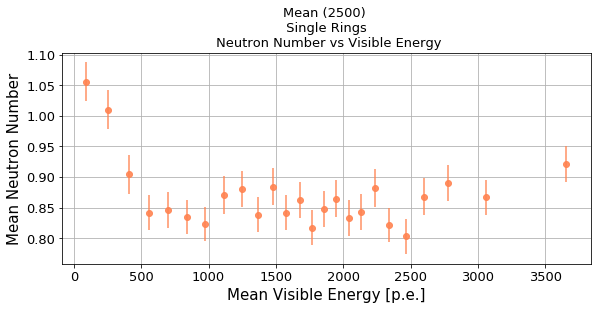

In [260]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
#plt.plot(binNeutronVisibleSR[:,0],binNeutronVisibleSR[:,1],'bo',alpha=0.1 )
axs=plt.errorbar(binNeutronVisibleSR[:,0], binNeutronVisibleSR[:,1],xerr=binErrorEnergyVisibleSR,yerr=binErrorNeutronVisibleSR ,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 

#plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Mean Visible Energy [p.e.]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean (2500) \n Single Rings \n Neutron Number vs Visible Energy') 
#plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

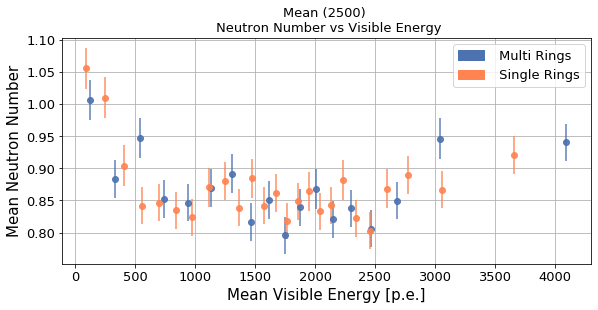

In [267]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
#plt.plot(binNeutronVisibleSR[:,0],binNeutronVisibleSR[:,1],'bo',alpha=0.1 )
axs=plt.errorbar(binNeutronVisibleMR[:,0], binNeutronVisibleMR[:,1],xerr=binErrorEnergyVisibleMR,yerr=binErrorNeutronVisibleMR ,c=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), fmt='o',alpha=0.9) 
axs=plt.errorbar(binNeutronVisibleSR[:,0], binNeutronVisibleSR[:,1],xerr=binErrorEnergyVisibleSR,yerr=binErrorNeutronVisibleSR ,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 

#plt.legend(handles=[blue_patch],loc='lower right')
red_patch = mpatches.Patch(color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), label=' Multi Rings')
blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label=' Single Rings')
plt.legend(handles=[red_patch, blue_patch],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Mean Visible Energy [p.e.]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean (2500) \n Neutron Number vs Visible Energy') 
#plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

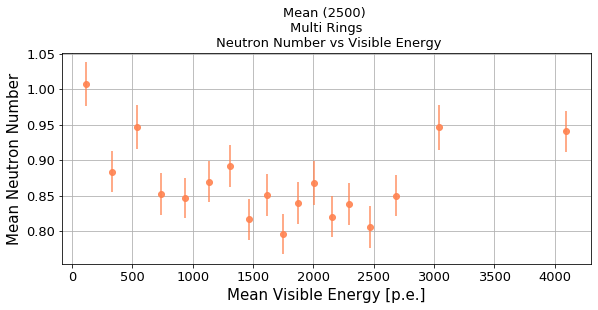

In [261]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
#plt.plot(binNeutronVisibleSR[:,0],binNeutronVisibleSR[:,1],'bo',alpha=0.1 )
axs=plt.errorbar(binNeutronVisibleMR[:,0], binNeutronVisibleMR[:,1],xerr=binErrorEnergyVisibleMR,yerr=binErrorNeutronVisibleMR ,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 

#plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Mean Visible Energy [p.e.]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean (2500) \n Multi Rings \n Neutron Number vs Visible Energy') 
#plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

## Binning

In [98]:
ThreeDPlot2=[]

for event in range(len(Y)):
     #All
    if Y[event,0] >0.5:
        ThreeDPlot2.append((NeutronNumber[event],VisibleE[event,0], 0)) #
    if Y[event,1] >0.5:
        ThreeDPlot2.append((NeutronNumber[event],VisibleE[event,0],1))
        
ThreeDPlot2=np.array(ThreeDPlot2)

In [99]:
SingleRingNeutronlist=[]
MultiRingNeutronlist=[]
for event in range(len(ThreeDPlot2)):
    if int(ThreeDPlot2[event,2]) == 0:
        SingleRingNeutronlist.append(ThreeDPlot2[event])
    else:
        MultiRingNeutronlist.append(ThreeDPlot2[event])
SingleRingNeutronlist= np.array(SingleRingNeutronlist)
MultiRingNeutronlist= np.array(MultiRingNeutronlist)

In [100]:
import copy
data = np.arange(25).reshape((5,5))
my_cmap = copy.copy(plt.cm.get_cmap('viridis')) # copy the default cmap
my_cmap.set_bad((0,0,0))
# plt.imshow(data, 
#            norm=matplotlib.colors.LogNorm(), 
#            interpolation='nearest', 
#            cmap=my_cmap)

In [101]:
SingleRingNeutronlist[:,1]

array([1439.72 ,  918.161, 2463.79 , ..., 2426.39 , 1818.55 , 2434.56 ])

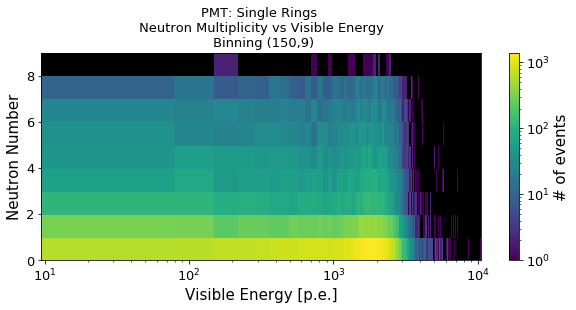

In [181]:
#(9,9)
plt.hist2d(SingleRingNeutronlist[:,1], SingleRingNeutronlist[:,0], bins=(150, 9), cmap=my_cmap, norm=colors.LogNorm())#,norm=DivergingNorm(1750))
cbar=plt.colorbar()
plt.title("PMT: Single Rings \n Neutron Multiplicity vs Visible Energy \n Binning (150,9)")
plt.xlabel("Visible Energy [p.e.]")
plt.ylabel("Neutron Number")
cbar.set_label('# of events', rotation=90)
plt.xscale('log')
plt.tight_layout(h_pad=1)
plt.show()

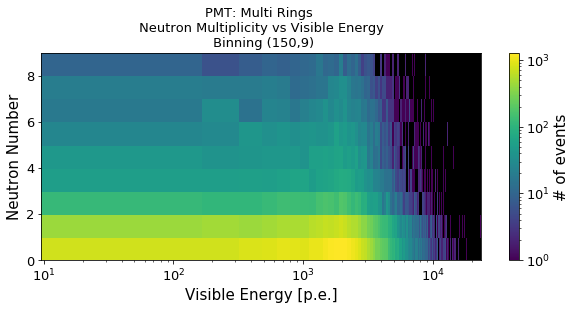

In [182]:
plt.hist2d(MultiRingNeutronlist[:,1], MultiRingNeutronlist[:,0],  bins=(150, 9), cmap=my_cmap ,norm=colors.LogNorm())
cbar=plt.colorbar()
plt.title("PMT: Multi Rings \n Neutron Multiplicity vs Visible Energy \n Binning (150,9)")
plt.xlabel("Visible Energy [p.e.]")
plt.ylabel("Neutron Number")
cbar.set_label('# of events', rotation=90)
plt.xscale('log')
plt.tight_layout(h_pad=1)
plt.show()

# Muon- Energy vs Neutron Multiplicity

In [380]:
MuonE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamRingCounting/Temp/EnergyMuon.npy",allow_pickle=True)

In [396]:
testlist=MuonE[:]
print(len(testlist),len(MuonE))


110441 110441


In [401]:
float(MuonE[4][0])

1637.36

In [430]:
MuonEnergy=[]
for event in range(len(Y)):
    if MuonE[event] ==0:
        MuonEnergy.append(0)
        continue
    else:
            
        if len(MuonE[event])==1:
            MuonEnergy.append(float(MuonE[event][0]))

In [431]:
len(MuonEnergy)

110441

In [432]:
zippedMuon = list(zip(MuonEnergy,NeutronNumber))
sortMuon= sorted(zippedMuon)
sortMuon = np.array(sortMuon,dtype=float)

In [433]:
sortNeutronMuonSR=[]
sortEnergyMuonSR=[]
sortNeutronMuonMR=[]
sortEnergyMuonMR =[]
for i in range(len(Y)):
    if Y[i,0] >0.5:
        sortNeutronMuonSR.append(float(sortMuon[i,1]))
        sortEnergyMuonSR.append(float(sortMuon[i,0]))
    if Y[i,1] >0.5:
        sortNeutronMuonMR.append(float(sortMuon[i,1]))
        sortEnergyMuonMR.append(float(sortMuon[i,0])) 

In [434]:
print(type(sortMuon[0,0]),sortMuon[0,0],len(sortMuon))

<class 'numpy.float64'> 0.0 110441


In [435]:

binNeutronMuonSR =[]
binNeutronMuonMR =[]
duid2=duid1=index= 0
duid2M=duid1M=indexM= 0
binsize=2500
for i in range(0,110441):
    if Y[i,0] >0.5:
        duid1= duid1+sortMuon[i,0]
        index = index+1 
        duid2= duid2+sortMuon[i,1]
        if index ==binsize:
            binNeutronMuonSR.append((duid1/binsize,duid2/binsize))
            duid2=duid1=index=0
    if Y[i,1] >0.5:
        duid1M= duid1M + sortMuon[i,0]
        indexM = indexM+1 
        duid2M= duid2M+sortMuon[i,1]
        if indexM ==binsize:
            binNeutronMuonMR.append((duid1M/binsize, duid2M/binsize))
            duid2M=duid1M=indexM=0
print(len(binNeutronMuonSR),len(binNeutronMuonMR))
binNeutronMuonSR = np.array(binNeutronMuonSR)
binNeutronMuonMR = np.array(binNeutronMuonMR)


25 18


In [436]:
binErrorNeutronMuonSR =[]
binErrorEnergyMuonSR = []
binErrorNeutronMuonMR =[]
binErrorEnergyMuonMR = []
errorvalueMuonEnSR=0
errorvalueMuonNnSR=0
errorvalueMuonEnMR=0
errorvalueMuonNnMR=0
index=indexM=0
index3=index4=0
binsize=2500

for i in range(len(sortEnergyMuonSR)):
    try:
        errorvalueMuonEnSR = errorvalueMuonEnSR + (sortEnergyMuonSR[i]-binNeutronMuonSR[index3,0])**2
        errorvalueMuonNnSR = errorvalueMuonNnSR + (sortNeutronMuonSR[i]-binNeutronMuonSR[index3,1])**2
        index = index+1 

        if index ==binsize:
            binErrorNeutronMuonSR.append(np.sqrt(errorvalueMuonNnSR/binsize)*(1/np.sqrt(binsize)))
            binErrorEnergyMuonSR.append(np.sqrt(errorvalueMuonEnSR/binsize)*(1/np.sqrt(binsize)))
            index=errorvalueMuonEnSR=errorvalueMuonNnSR=0
            index3=index3+1
    except IndexError:
        break
for i in range(len(sortEnergyMuonMR)):
    try:
        errorvalueMuonEnMR = errorvalueMuonEnMR + (sortEnergyMuonMR[i]- binNeutronMuonMR[index4,0])**2
        errorvalueMuonNnMR = errorvalueMuonNnMR + (sortNeutronMuonMR[i]-binNeutronMuonMR[index4,1])**2
        indexM = indexM+1 

        if indexM ==binsize:
            binErrorNeutronMuonMR.append(np.sqrt(errorvalueMuonNnMR/binsize)*(1/np.sqrt(binsize)))
            binErrorEnergyMuonMR.append(np.sqrt(errorvalueMuonEnMR/binsize)*(1/np.sqrt(binsize)))
            indexM=errorvalueMuonEnMR=errorvalueMuonNnMR=0
            index4=index4+1
    except IndexError:
        break
binErrorNeutronMuonMR = np.array(binErrorNeutronMuonMR)
binErrorEnergyMuonMR = np.array(binErrorEnergyMuonMR)
binErrorNeutronMuonSR = np.array(binErrorNeutronMuonSR)
binErrorEnergyMuonSR = np.array(binErrorEnergyMuonSR)

In [226]:
(sortEnergyVisibleMR[0]- binNeutronVisibleMR[0,0])**2

267.66475350088007

In [441]:
len(binErrorEnergyMuonMR)
binErrorNeutronMuonMR

array([0.03327051, 0.03214644, 0.03042506, 0.02887445, 0.02662635,
       0.02908209, 0.02983574, 0.02953183, 0.02756083, 0.02969743,
       0.0306232 , 0.02882342, 0.02960357, 0.02968649, 0.02869143,
       0.02888653, 0.02837338, 0.02915736])

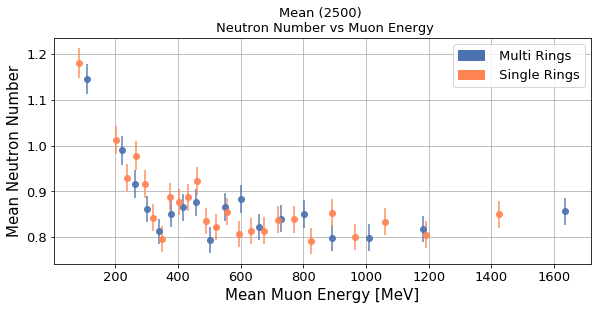

In [438]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
#plt.plot(binNeutronVisibleSR[:,0],binNeutronVisibleSR[:,1],'bo',alpha=0.1 )
axs=plt.errorbar(binNeutronMuonMR[:,0], binNeutronMuonMR[:,1],xerr=binErrorEnergyMuonMR,yerr=binErrorNeutronMuonMR ,c=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), fmt='o',alpha=0.9) 
axs=plt.errorbar(binNeutronMuonSR[:,0], binNeutronMuonSR[:,1],xerr=binErrorEnergyMuonSR,yerr=binErrorNeutronMuonSR ,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 

#plt.legend(handles=[blue_patch],loc='lower right')
red_patch = mpatches.Patch(color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), label=' Multi Rings')
blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label=' Single Rings')
plt.legend(handles=[red_patch, blue_patch],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Mean Muon Energy [MeV]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean (2500) \n Neutron Number vs Muon Energy') 
#plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

# Neutrino Energy vs Neutron Number

In [443]:
NeutrinoEnergy

array([1178.78 , 1538.07 , 1425.78 , ...,  673.975, 1040.74 ,  933.214])

In [555]:
countershift=100000 #normal 0
countershift=0

In [556]:
zippedNeutrino = list(zip(NeutrinoEnergy[countershift:],NeutronNumber[countershift:]))
sortNeutrino= sorted(zippedNeutrino)
sortNeutrino = np.array(sortNeutrino)

In [557]:

sortNeutronNeutrinoSR=[]
sortEnergyNeutrinoSR=[]
sortNeutronNeutrinoMR=[]
sortEnergyNeutrinoMR =[]

for i in range(len(Y)-countershift):
    if Y[countershift+i,0] >0.5:
        sortNeutronNeutrinoSR.append(float(sortNeutrino[i,1]))
        sortEnergyNeutrinoSR.append(float(sortNeutrino[i,0]))
    if Y[countershift+i,1] >0.5:
        sortNeutronNeutrinoMR.append(float(sortNeutrino[i,1]))
        sortEnergyNeutrinoMR.append(float(sortNeutrino[i,0]))

In [558]:
print(len(sortNeutronNeutrinoMR),len(sortEnergyNeutrinoMR))

45672 45672


In [560]:

binNeutronNeutrinoSR =[]
binNeutronNeutrinoMR =[]
duid2=duid1=index=0
duid2M=duid1M=indexM=0
binsize=2500
for i in range(0,110441):
    try:
        if Y[countershift+i,0] >0.5:

            duid1= duid1+sortNeutrino[i,0]
            index = index+1 
            duid2= duid2+sortNeutrino[i,1]

            if index ==binsize:
                binNeutronNeutrinoSR.append((duid1/binsize,duid2/binsize))
                duid2=duid1=index=0
        if Y[countershift+i,1] >0.5:
            duid1M= duid1M+sortNeutrino[i,0]
            indexM = indexM+1 
            duid2M= duid2M+sortNeutrino[i,1]
            if indexM ==binsize:
                binNeutronNeutrinoMR.append((duid1M/binsize, duid2M/binsize))
                duid2M=duid1M=indexM=0
    except IndexError:
        break
binNeutronNeutrinoSR = np.array(binNeutronNeutrinoSR)
binNeutronNeutrinoMR = np.array(binNeutronNeutrinoMR)

In [561]:
print(len(sortEnergyNeutrinoSR),len(binNeutronNeutrinoSR),len(sortEnergyNeutrinoMR),len(binNeutronNeutrinoMR))
#print(binNeutronNeutrinoSR)

64769 25 45672 18


In [562]:
binErrorNeutronNeutrinoSR =[]
binErrorEnergyNeutrinoSR = []
binErrorNeutronNeutrinoMR =[]
binErrorEnergyNeutrinoMR = []
errorvalueEnSR=0
errorvalueNnSR=0
errorvalueEnMR=0
errorvalueNnMR=0
index=indexM=0
index3=index4=0


for i in range(len(sortEnergyNeutrinoSR)):
    try:
        errorvalueEnSR = errorvalueEnSR + (sortEnergyNeutrinoSR[i]-binNeutronNeutrinoSR[index3,0])**2
        errorvalueNnSR = errorvalueNnSR + (sortNeutronNeutrinoSR[i]-binNeutronNeutrinoSR[index3,1])**2
        index = index+1 

        if index ==binsize:
            
            binErrorNeutronNeutrinoSR.append(np.sqrt(errorvalueNnSR/binsize)*(1/np.sqrt(binsize)))
            binErrorEnergyNeutrinoSR.append(np.sqrt(errorvalueEnSR/binsize)*(1/np.sqrt(binsize)))
            index=errorvalueEnSR=errorvalueNnSR=0
            index3=index3+1
    except IndexError:
        break
for i in range(len(sortEnergyNeutrinoMR)):
    try:
        errorvalueEnMR = errorvalueEnMR + (sortEnergyNeutrinoMR[i]- binNeutronNeutrinoMR[index4,0])**2
        errorvalueNnMR = errorvalueNnMR + (sortNeutronNeutrinoMR[i]-binNeutronNeutrinoMR[index4,1])**2
        indexM = indexM+1 

        if indexM ==binsize:
            binErrorNeutronNeutrinoMR.append(np.sqrt(errorvalueNnMR/binsize)*(1/np.sqrt(binsize)))
            binErrorEnergyNeutrinoMR.append(np.sqrt(errorvalueEnMR/binsize)*(1/np.sqrt(binsize)))
            indexM=errorvalueEnMR=errorvalueNnMR=0
            index4=index4+1
    except IndexError:
        break
binErrorNeutronNeutrinoMR = np.array(binErrorNeutronNeutrinoMR)
binErrorEnergyNeutrinoMR = np.array(binErrorEnergyNeutrinoMR)
binErrorNeutronNeutrinoSR = np.array(binErrorNeutronNeutrinoSR)
binErrorEnergyNeutrinoSR = np.array(binErrorEnergyNeutrinoSR)

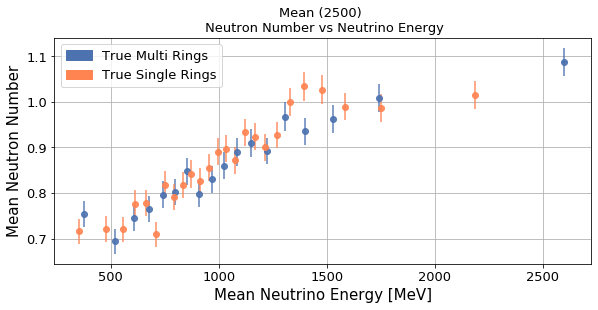

In [563]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
#plt.plot(binNeutronVisibleSR[:,0],binNeutronVisibleSR[:,1],'bo',alpha=0.1 )
axs=plt.errorbar(binNeutronNeutrinoMR[:,0], binNeutronNeutrinoMR[:,1],xerr=binErrorEnergyNeutrinoMR,yerr=binErrorNeutronNeutrinoMR ,c=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), fmt='o',alpha=0.9) 
axs=plt.errorbar(binNeutronNeutrinoSR[:,0], binNeutronNeutrinoSR[:,1],xerr=binErrorEnergyNeutrinoSR,yerr=binErrorNeutronNeutrinoSR ,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 

#plt.legend(handles=[blue_patch],loc='lower right')
red_patch = mpatches.Patch(color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), label='True Multi Rings')
blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Single Rings')
plt.legend(handles=[red_patch, blue_patch],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Mean Neutrino Energy [MeV]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean ({}) \n Neutron Number vs Neutrino Energy'.format(binsize)) 
#plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

# Accurency vs Neutron Number

In [470]:
feature_maps.shape

(10441, 2)

In [532]:
zippedNeutrino = list(zip(NeutrinoEnergy[100000:],NeutronNumber[100000:]))
sortNeutrino= sorted(zippedNeutrino)
sortNeutrino = np.array(sortNeutrino)

In [533]:
sortNeutronNeutrinoSR=[]
sortEnergyNeutrinoSR=[]
sortNeutronNeutrinoMR=[]
sortEnergyNeutrinoMR =[]
for i in range(len(feature_maps)):
    if feature_maps[i,0] >0.5:
        sortNeutronNeutrinoSR.append(float(sortNeutrino[i,1]))
        sortEnergyNeutrinoSR.append(float(sortNeutrino[i,0]))
    if feature_maps[i,1] >0.5:
        sortNeutronNeutrinoMR.append(float(sortNeutrino[i,1]))
        sortEnergyNeutrinoMR.append(float(sortNeutrino[i,0]))

In [534]:

binNeutronNeutrinoSR =[]
binNeutronNeutrinoMR =[]
duid2=duid1=index=0
duid2M=duid1M=indexM=0
binsize=250
for i in range(len(feature_maps)):
    if feature_maps[i,0] >0.5:
        duid1= duid1+sortNeutrino[i,0]
        index = index+1 
        duid2= duid2+sortNeutrino[i,1]
        if index ==binsize:
            binNeutronNeutrinoSR.append((duid1/binsize,duid2/binsize))
            duid2=duid1=index=0
    if feature_maps[i,1] >0.5:
        duid1M= duid1M+sortNeutrino[i,0]
        indexM = indexM+1 
        duid2M= duid2M+sortNeutrino[i,1]
        if indexM ==binsize:
            binNeutronNeutrinoMR.append((duid1M/binsize, duid2M/binsize))
            duid2M=duid1M=indexM=0
binNeutronNeutrinoSR = np.array(binNeutronNeutrinoSR)
binNeutronNeutrinoMR = np.array(binNeutronNeutrinoMR)

In [535]:
binErrorNeutronNeutrinoSR =[]
binErrorEnergyNeutrinoSR = []
binErrorNeutronNeutrinoMR =[]
binErrorEnergyNeutrinoMR = []
errorvalueEnSR=0
errorvalueNnSR=0
errorvalueEnMR=0
errorvalueNnMR=0
index=indexM=0
index3=index4=0


for i in range(len(sortEnergyNeutrinoSR)):
    try:
        errorvalueEnSR = errorvalueEnSR + (sortEnergyNeutrinoSR[i]-binNeutronNeutrinoSR[index3,0])**2
        errorvalueNnSR = errorvalueNnSR + (sortNeutronNeutrinoSR[i]-binNeutronNeutrinoSR[index3,1])**2
        index = index+1 

        if index ==binsize:
            binErrorNeutronNeutrinoSR.append(np.sqrt(errorvalueNnSR/binsize)*(1/np.sqrt(binsize)))
            binErrorEnergyNeutrinoSR.append(np.sqrt(errorvalueEnSR/binsize)*(1/np.sqrt(binsize)))
            index=errorvalueEnSR=errorvalueNnSR=0
            index3=index3+1
    except IndexError:
        break
for i in range(len(sortEnergyNeutrinoMR)):
    try:
        errorvalueEnMR = errorvalueEnMR + (sortEnergyNeutrinoMR[i]- binNeutronNeutrinoMR[index4,0])**2
        errorvalueNnMR = errorvalueNnMR + (sortNeutronNeutrinoMR[i]-binNeutronNeutrinoMR[index4,1])**2
        indexM = indexM+1 

        if indexM ==binsize:
            binErrorNeutronNeutrinoMR.append(np.sqrt(errorvalueNnMR/binsize)*(1/np.sqrt(binsize)))
            binErrorEnergyNeutrinoMR.append(np.sqrt(errorvalueEnMR/binsize)*(1/np.sqrt(binsize)))
            indexM=errorvalueEnMR=errorvalueNnMR=0
            index4=index4+1
    except IndexError:
        break
binErrorNeutronNeutrinoMR = np.array(binErrorNeutronNeutrinoMR)
binErrorEnergyNeutrinoMR = np.array(binErrorEnergyNeutrinoMR)
binErrorNeutronNeutrinoSR = np.array(binErrorNeutronNeutrinoSR)
binErrorEnergyNeutrinoSR = np.array(binErrorEnergyNeutrinoSR)

In [536]:
print(len(binNeutronNeutrinoMR[:,0]),len( binNeutronVisibleMR[:,1]),len(binErrorEnergyNeutrinoMR),len(binErrorNeutronNeutrinoMR) )
print(len(binNeutronNeutrinoMR[:,0]),len(binNeutronNeutrinoSR),len(binErrorEnergyNeutrinoMR),len(binErrorEnergyNeutrinoSR))

13 18 13 13
13 28 13 28


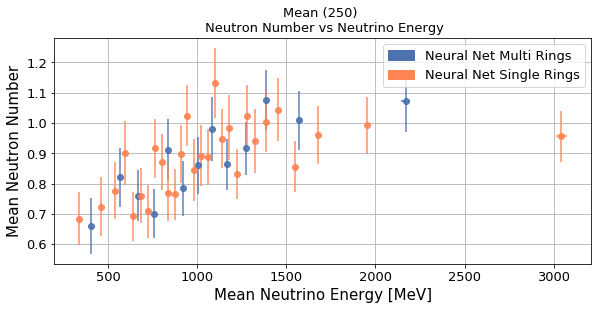

In [537]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
#plt.plot(binNeutronVisibleSR[:,0],binNeutronVisibleSR[:,1],'bo',alpha=0.1 )
axs=plt.errorbar(binNeutronNeutrinoMR[:,0], binNeutronNeutrinoMR[:,1],xerr=binErrorEnergyNeutrinoMR,yerr=binErrorNeutronNeutrinoMR ,c=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), fmt='o',alpha=0.9) 
axs=plt.errorbar(binNeutronNeutrinoSR[:,0], binNeutronNeutrinoSR[:,1],xerr=binErrorEnergyNeutrinoSR,yerr=binErrorNeutronNeutrinoSR ,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 

#plt.legend(handles=[blue_patch],loc='lower right')
red_patch = mpatches.Patch(color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), label='Neural Net Multi Rings')
blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='Neural Net Single Rings')
plt.legend(handles=[red_patch, blue_patch],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Mean Neutrino Energy [MeV]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean ({}) \n Neutron Number vs Neutrino Energy'.format(binsize)) 
#plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

In [538]:
vergleich1x=binNeutronNeutrinoMR[:,0]
vergleich1y=binNeutronNeutrinoMR[:,1]
vergleich1ex=binErrorEnergyNeutrinoMR
vergleich1ey=binErrorNeutronNeutrinoMR 

vergleich2x=binNeutronNeutrinoSR[:,0]
vergleich2y=binNeutronNeutrinoSR[:,1]
vergleich2ex=binErrorEnergyNeutrinoSR
vergleich2ey=binErrorNeutronNeutrinoSR 

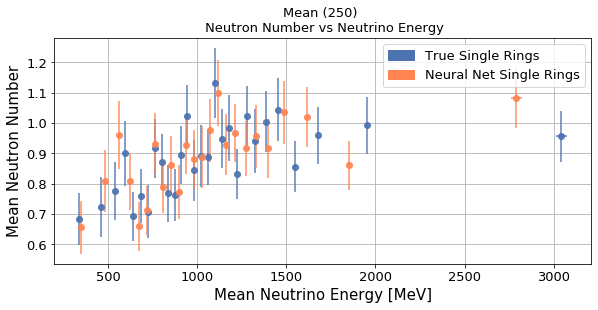

In [553]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
#plt.plot(binNeutronVisibleSR[:,0],binNeutronVisibleSR[:,1],'bo',alpha=0.1 )
axs=plt.errorbar(vergleich2x, vergleich2y,xerr=vergleich2ex,yerr=vergleich2ey ,c=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), fmt='o',alpha=0.9) 
axs=plt.errorbar(binNeutronNeutrinoSR[:,0], binNeutronNeutrinoSR[:,1],xerr=binErrorEnergyNeutrinoSR,yerr=binErrorNeutronNeutrinoSR ,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 

#plt.legend(handles=[blue_patch],loc='lower right')
red_patch = mpatches.Patch(color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), label='True Single Rings')
blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='Neural Net Single Rings')
plt.legend(handles=[red_patch, blue_patch],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Mean Neutrino Energy [MeV]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean ({}) \n Neutron Number vs Neutrino Energy'.format(binsize)) 
#plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

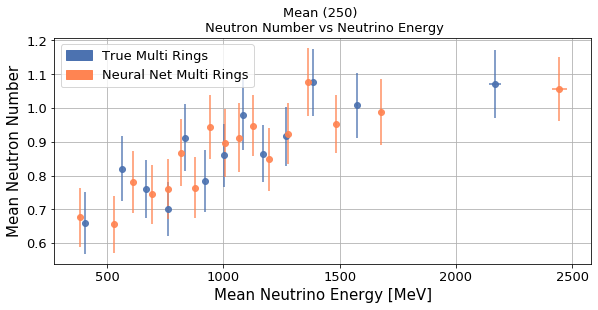

In [554]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
#plt.plot(binNeutronVisibleSR[:,0],binNeutronVisibleSR[:,1],'bo',alpha=0.1 )
axs=plt.errorbar(vergleich1x, vergleich1y,xerr=vergleich1ex,yerr=vergleich1ey ,c=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), fmt='o',alpha=0.9) 
axs=plt.errorbar(binNeutronNeutrinoMR[:,0], binNeutronNeutrinoMR[:,1],xerr=binErrorEnergyNeutrinoMR,yerr=binErrorNeutronNeutrinoMR ,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 

#plt.legend(handles=[blue_patch],loc='lower right')
red_patch = mpatches.Patch(color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), label='True Multi Rings')
blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='Neural Net Multi Rings')
plt.legend(handles=[red_patch, blue_patch],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Mean Neutrino Energy [MeV]')

# naming the y axis 
plt.ylabel('Mean Neutron Number') 

# giving a title to my graph 
plt.title('Mean ({}) \n Neutron Number vs Neutrino Energy'.format(binsize)) 
#plt.xscale('log') 
# function to show the plot 
plt.tight_layout()
plt.show() 

In [531]:
print(len(vergleich1x),len(binNeutronNeutrinoMR[:,0]))
print(len(vergleich2x),len(binNeutronNeutrinoSR[:,0]))
print(13+28, 24+17)

13 17
28 24
41 41


# Pion Enrgy vs Accuarncy

In [213]:
PionEn2=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if Y[100000+event,1] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
    if PionE[100000+event] ==0:
        dummyindex2.append(0)
        continue
    else:
        dummyindex2.append(1)
        Pion_Counter2 = Pion_Counter+1
        if Y[100000+event,1]>0.5 and len(PionE[100000+event])==1:
            PionEn2.append((float(PionE[100000+event][0]),feature_maps[event,1]))
#         if len(PionE[100000+event])==2:
#             PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
#             PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
#         if len(PionE[100000+event])==3:
#             PionEn.append((float(PionE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
#             PionEn.append((float(PionE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
#             PionEn.append((float(PionE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,0],feature_maps[event,1],Y[100000+event,0],Y[100000+event,1]))
PionEn2=np.array(PionEn2)


In [231]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0
#Range PionEn
for event in range(len(PionEn2)):

#     if PionEn2[event,0]<=100 and PionEn2[event,1]>0.5:
#         Bin100 = Bin100+1
#     if PionEn2[event,0]<=100:
#         pi1=pi1+1
        
#     if 100<=PionEn2[event,0]<=200 and PionEn2[event,1]>0.5:
#         Bin200 = Bin200+1
#     if 100<=PionEn2[event,0]<=200:
#         pi2=pi2+1
        
    if 200<=PionEn2[event,0]<=300 and PionEn2[event,1]>0.5:
        Bin300 = Bin300+1
    if 100<=PionEn2[event,0]<=300:
        pi3=pi3+1
  
    if 300<=PionEn2[event,0]<=400 and PionEn2[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=PionEn2[event,0]<=400:
        pi4=pi4+1
        
    if 400<=PionEn2[event,0]<=500 and PionEn2[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=PionEn2[event,0]<=500:
        pi5=pi5+1
        
    if 500<=PionEn2[event,0]<=600 and PionEn2[event,1]>0.5:
        Bin600 = Bin600+1
    if 500<=PionEn2[event,0]<=600:
        pi6=pi6+1
        
    if 600<=PionEn2[event,0]<=700 and PionEn2[event,1]>0.5:
        Bin700 = Bin700+1
    if 600<=PionEn2[event,0]<=700:
        pi7=pi7+1
        
    if 700<=PionEn2[event,0]<=800 and PionEn2[event,1]>0.5:
        Bin800 = Bin800+1
    if 700<=PionEn2[event,0]<=800:
        pi8=pi8+1
        
    if 800<=PionEn2[event,0]<=900 and PionEn2[event,1]>0.5:
        Bin900 = Bin900+1
    if 800<=PionEn2[event,0]<=900:
        pi9=pi9+1
        
    if 900<=PionEn2[event,0]<=1000 and PionEn2[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 900<=PionEn2[event,0]<=1000:
        pi10=pi10+1
        
    if 1000<=PionEn2[event,0]<=1500 and PionEn2[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 1000<=PionEn2[event,0]<=1500:
        pi11=pi11+1

    if 1500<=PionEn2[event,0]<=2000 and PionEn2[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 1500<=PionEn2[event,0]<=2000:
        pi12=pi12+1
        
    if 2000<=PionEn2[event,0]<=3000 and PionEn2[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 2000<=PionEn2[event,0]<=3000:
        pi13=pi13+1
        
#     if 3000<=PionEn2[event,0]<=4000 and PionEn2[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=PionEn2[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=PionEn2[event,0]<=8000 and PionEn2[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=PionEn2[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8, pi9, pi10, pi11, pi12, pi13, pi14, pi15)                
Pion_AccMR=[Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6,Bin700/pi7,Bin800/pi8,Bin900/pi9,Bin1000/pi10,Bin1500/pi11,Bin2000/pi12,Bin3000/pi13]
Pion_AccMRError=(1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6),1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9),1/sqrt(pi10),1/sqrt(pi11),1/sqrt(pi12),1/sqrt(pi13))

errorPionMR=[]
for i in range(12):
    errorPionMR.append(Pion_AccMRError[i]* Pion_AccMR[i])

     

0 0 1055 772 467 211 133 63 32 23 47 17 14 0 0


In [242]:
errorPionMR=[]

for i in range(11):
    errorPionMR.append(Pion_AccMRError[i]* Pion_AccMR[i])


In [241]:
len(Pion_AccMRError)

11

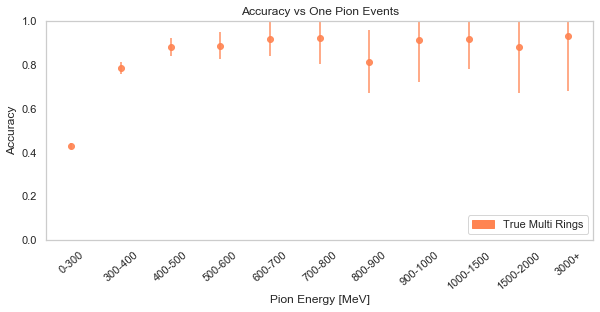

In [264]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,11)

axs=plt.errorbar(x, Pion_AccMR,errorPionMR,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Multi Rings')
plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Pion Energy [MeV]')



labels=("0-300","300-400","400-500","500-600","600-700","700-800","800-900","900-1000","1000-1500","1500-2000","3000+")
          # Get locations and labels
matplotlib.pyplot.xticks(np.arange(len(Pion_AccMR)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs One Pion Events') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [227]:
if 100<=PionEn2[1,0]<=300 and PionEn2[event,1] > 0.5:
    print("Ture",PionEn2[100,1])

## Kaon

In [78]:
len(feature_maps)

10441

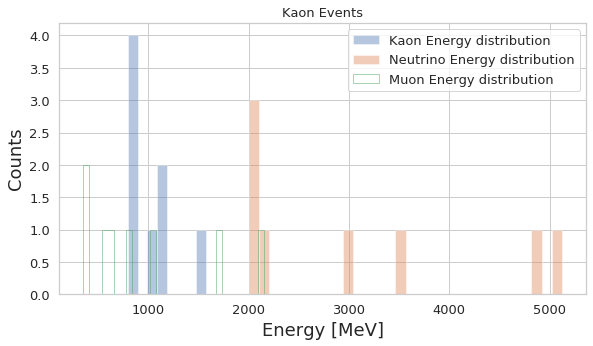

In [77]:

MuonEn=[]
KaonEn=[]

dummyindex=[]
for event in range(len(feature_maps)):
    if KaonE[100000+event] ==0:
        dummyindex.append(0)
        continue
    else:
        dummyindex.append(1)
        if len(KaonE[100000+event])==1:
            KaonEn.append((float(KaonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
        if len(KaonE[100000+event])==2:
            KaonEn.append((float(KaonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            KaonEn.append((float(KaonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
        if len(KaonE[100000+event])==3:
            KaonEn.append((float(KaonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            KaonEn.append((float(KaonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            KaonEn.append((float(KaonE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
KaonEn=np.array(KaonEn)

for event in range(len(feature_maps)):
    if MuonE[100000+event] ==0:
        continue
    else:
        if len(MuonE[100000+event])==1 and dummyindex[event]==1:
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
        if len(MuonE[100000+event])==2 and dummyindex[event]==1:
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
        if len(MuonE[100000+event])==3 and dummyindex[event]==1:
            MuonEn.append((float(MuonE[100000+event][0]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            MuonEn.append((float(MuonE[100000+event][1]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
            MuonEn.append((float(MuonE[100000+event][2]),NeutrinoEnergy[100000+event],feature_maps[event,:],Y[100000+event,:]))
MuonEn=np.array(MuonEn)

plt.hist(KaonEn[:,0], bins=8, alpha=0.4, label='Kaon Energy distribution')
plt.hist(KaonEn[:,1], bins=30, alpha=0.4, label='Neutrino Energy distribution')
plt.hist(MuonEn[:,0], bins=30, alpha=0.5, label='Muon Energy distribution',histtype='step', stacked=True, fill=False)
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')

plt.legend(loc='upper right')
plt.title('Kaon Events')
plt.show()


In [108]:
KaonEn [:,0]

array([1572.68, 809.283, 887.41, 799.162, 1009.34, 887.758, 1106.48,
       1103.99], dtype=object)

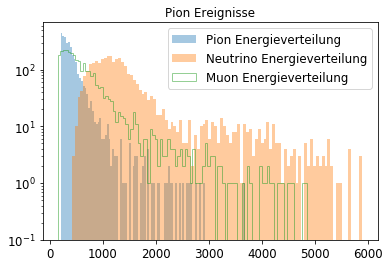

# Visble Energy

In [23]:
print(NeutrinoEnergy.shape, VisibleE.shape, len(dummyindex))

(110441,) (110441, 2) 10441


In [24]:
colorSR=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
colorMR=(1, 0.5176470588235295, 0.3215686274509804)

In [25]:
countershift=100000
#countershift=0

In [26]:
ViEnSr=[]
ViEnMr=[]

for event in range(len(Y)):
    if Y[countershift+event,0] >0.5:
        ViEnSr.append((VisibleE[event+countershift]))

    if Y[countershift+event,1] >0.5:
        ViEnMr.append((VisibleE[event+countershift]))

ViEnSr=np.array(ViEnSr)
ViEnMr=np.array(ViEnMr)

IndexError: index 110441 is out of bounds for axis 0 with size 110441

In [27]:

ViEnSr=np.array(ViEnSr)
ViEnMr=np.array(ViEnMr)

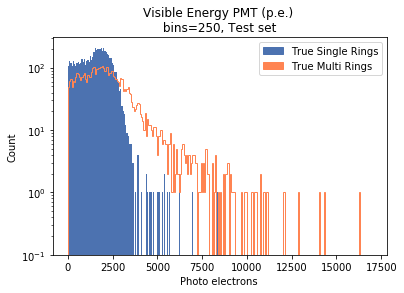

In [28]:
#### PMT Photoelectorns 
plt.hist(ViEnSr[:,0],range=(0,17000), bins=250,histtype='stepfilled',log=True,color=colorSR)
plt.hist(ViEnMr[:,0], range=(0,17000),bins=250 , histtype='step',log=True,color=colorMR)
plt.title("Visible Energy PMT (p.e.) \n bins=250, Test set ")
plt.xlabel("Photo electrons ")
plt.ylabel("Count")
plt.grid(False)

red_patch = mpatches.Patch(color=colorSR, label='True Single Rings')
blue_patch = mpatches.Patch(color=colorMR, label='True Multi Rings')


plt.legend(handles=[red_patch, blue_patch],loc='upper right')


plt.show()

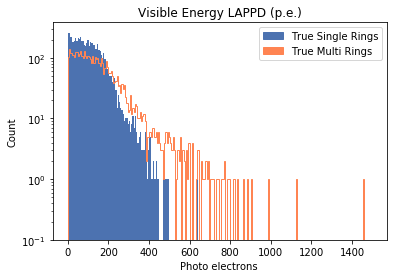

In [29]:
### LAPPD

plt.hist(ViEnSr[:,1], range=(0,1500), bins=250,histtype='stepfilled',log=True,color=colorSR)
plt.hist(ViEnMr[:,1], range=(0,1500), bins=250 , histtype='step',log=True,color=colorMR)
plt.title("Visible Energy LAPPD (p.e.)")
plt.xlabel("Photo electrons ")
plt.ylabel("Count")
plt.grid(False)

red_patch = mpatches.Patch(color=colorSR, label='True Single Rings')
blue_patch = mpatches.Patch(color=colorMR, label='True Multi Rings')


plt.legend(handles=[red_patch, blue_patch],loc='upper right')


# Visible Energy vs accurency

In [30]:
VisiblePMTEnergy=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if Y[100000+event,1] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        VisiblePMTEnergy.append((float(VisibleE[100000+event,0]),feature_maps[event,1]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

VisiblePMTEnergy=np.array(VisiblePMTEnergy)

In [31]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(VisiblePMTEnergy)):

    if VisiblePMTEnergy[event,0]<=100 and VisiblePMTEnergy[event,1]>0.5:
        Bin100 = Bin100+1
    if VisiblePMTEnergy[event,0]<=100:
         pi1=pi1+1
        
    if 100<=VisiblePMTEnergy[event,0]<=200 and VisiblePMTEnergy[event,1]>0.5:
         Bin200 = Bin200+1
    if 100<=VisiblePMTEnergy[event,0]<=200:
         pi2=pi2+1
        
    if 200<=VisiblePMTEnergy[event,0]<=300 and VisiblePMTEnergy[event,1]>0.5:
        Bin300 = Bin300+1
    if 200<=VisiblePMTEnergy[event,0]<=300:
        pi3=pi3+1
  
    if 300<=VisiblePMTEnergy[event,0]<=400 and VisiblePMTEnergy[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=VisiblePMTEnergy[event,0]<=400:
        pi4=pi4+1
        
    if 400<=VisiblePMTEnergy[event,0]<=800 and VisiblePMTEnergy[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=VisiblePMTEnergy[event,0]<=800:
        pi5=pi5+1
        
    if 800<=VisiblePMTEnergy[event,0]<=1200 and VisiblePMTEnergy[event,1]>0.5:
        Bin600 = Bin600+1
    if 800<=VisiblePMTEnergy[event,0]<=1200:
        pi6=pi6+1
        
    if 1200<=VisiblePMTEnergy[event,0]<=1800 and VisiblePMTEnergy[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=VisiblePMTEnergy[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=VisiblePMTEnergy[event,0]<=2500 and VisiblePMTEnergy[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=VisiblePMTEnergy[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=VisiblePMTEnergy[event,0]<=5000 and VisiblePMTEnergy[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=VisiblePMTEnergy[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=VisiblePMTEnergy[event,0]<=10000 and VisiblePMTEnergy[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=VisiblePMTEnergy[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=VisiblePMTEnergy[event,0]<=15000 and VisiblePMTEnergy[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=VisiblePMTEnergy[event,0]<=15000:
        pi11=pi11+1

    if 15000<=VisiblePMTEnergy[event,0]<=20000 and VisiblePMTEnergy[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=VisiblePMTEnergy[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=VisiblePMTEnergy[event,0]<=80000 and VisiblePMTEnergy[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=VisiblePMTEnergy[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=VisiblePMTEnergy[event,0]<=4000 and VisiblePMTEnergy[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=VisiblePMTEnergy[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=VisiblePMTEnergy[event,0]<=8000 and VisiblePMTEnergy[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=VisiblePMTEnergy[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8, pi9, pi10, pi11, pi12, pi13, pi14, pi15) 

VisiblePMTEnergy_AccMR=[Bin100/pi1,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6,Bin700/pi7,Bin800/pi8,Bin900/pi9,Bin1000/pi10,Bin1500/pi11,Bin2000/pi12]
VisiblePMTEnergy_AccMRError=(1/sqrt(pi1),1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6),1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9),1/sqrt(pi10),1/sqrt(pi11),1/sqrt(pi12))

errorVisiblePMTEnergyMR=[]
for i in range(12):
    errorVisiblePMTEnergyMR.append(VisiblePMTEnergy_AccMRError[i]* VisiblePMTEnergy_AccMR[i])

     

76 96 83 85 430 414 797 965 1186 190 13 1 0 0 0


In [46]:
print(len(VisiblePMTEnergy_AccMR),len(errorVisiblePMTEnergyMR),len(x))

NameError: name 'x' is not defined

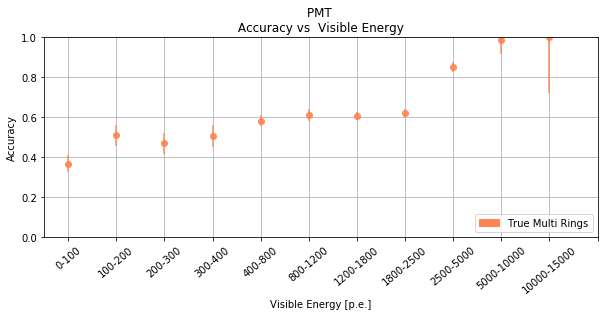

In [32]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,11)

axs=plt.errorbar(x, VisiblePMTEnergy_AccMR[:11],errorVisiblePMTEnergyMR[:11],c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Multi Rings')
plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000")
          # Get locations and labels
plt.xticks(np.arange(len(VisiblePMTEnergy_AccMR)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('PMT \n Accuracy vs  Visible Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [33]:
VisibleLAPPDEnergy=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if Y[100000+event,1] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        VisibleLAPPDEnergy.append((float(VisibleE[100000+event,1]),feature_maps[event,1]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

VisibleLAPPDEnergy=np.array(VisibleLAPPDEnergy)

In [54]:
VisiblePMTEnergy[1,1]

1.0666693924576975e-05

In [55]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(VisibleLAPPDEnergy)):

    if VisibleLAPPDEnergy[event,0]<=100 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin100 = Bin100+1
    if VisibleLAPPDEnergy[event,0]<=100:
         pi1=pi1+1
        
    if 100<=VisibleLAPPDEnergy[event,0]<=200 and VisibleLAPPDEnergy[event,1]>0.5:
         Bin200 = Bin200+1
    if 100<=VisibleLAPPDEnergy[event,0]<=200:
         pi2=pi2+1
        
    if 200<=VisibleLAPPDEnergy[event,0]<=300 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin300 = Bin300+1
    if 200<=VisibleLAPPDEnergy[event,0]<=300:
        pi3=pi3+1
  
    if 300<=VisibleLAPPDEnergy[event,0]<=400 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=VisibleLAPPDEnergy[event,0]<=400:
        pi4=pi4+1
        
    if 400<=VisibleLAPPDEnergy[event,0]<=800 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=VisibleLAPPDEnergy[event,0]<=800:
        pi5=pi5+1
        
    if 800<=VisibleLAPPDEnergy[event,0]<=1200 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin600 = Bin600+1
    if 800<=VisibleLAPPDEnergy[event,0]<=1200:
        pi6=pi6+1
        
    if 1200<=VisibleLAPPDEnergy[event,0]<=1800 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=VisibleLAPPDEnergy[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=VisibleLAPPDEnergy[event,0]<=2500 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=VisibleLAPPDEnergy[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=VisibleLAPPDEnergy[event,0]<=5000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=VisibleLAPPDEnergy[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=VisibleLAPPDEnergy[event,0]<=10000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=VisibleLAPPDEnergy[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=VisibleLAPPDEnergy[event,0]<=15000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=VisibleLAPPDEnergy[event,0]<=15000:
        pi11=pi11+1

    if 15000<=VisibleLAPPDEnergy[event,0]<=20000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=VisibleLAPPDEnergy[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=VisibleLAPPDEnergy[event,0]<=80000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=VisibleLAPPDEnergy[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=VisibleLAPPDEnergy[event,0]<=4000 and VisibleLAPPDEnergy[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=VisibleLAPPDEnergy[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=VisibleLAPPDEnergy[event,0]<=8000 and VisibleLAPPDEnergy[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=VisibleLAPPDEnergy[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8, pi9, pi10, pi11, pi12, pi13, pi14, pi15) 

VisibleLAPPDEnergy_AccMR=[Bin100/pi1,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6,Bin700/pi7]
VisibleLAPPDEnergy_AccMRError=(1/sqrt(pi1),1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6),1/sqrt(pi7))

errorVisibleLAPPDEnergyMR=[]
for i in range(7):
    errorVisibleLAPPDEnergyMR.append(VisibleLAPPDEnergy_AccMRError[i]* VisibleLAPPDEnergy_AccMR[i])

     

1926 1457 626 195 155 7 1 0 0 0 0 0 0 0 0


In [56]:
print(len(VisiblePMTEnergy_AccMR),len(errorVisiblePMTEnergyMR),len(x))

12 12 13


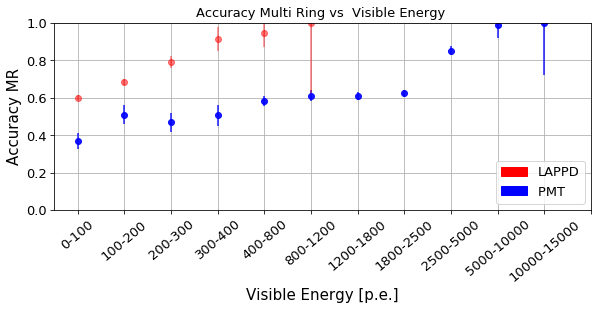

In [57]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,11)
x1=range(0,6)
axs=plt.errorbar(x, VisiblePMTEnergy_AccMR[:11],errorVisiblePMTEnergyMR[:11],c='blue', fmt='o',alpha=0.9) #(1, 0.5176470588235295, 0.3215686274509804)
axs=plt.errorbar(x1, VisibleLAPPDEnergy_AccMR[:6],errorVisibleLAPPDEnergyMR[:6],c='red', fmt='o',alpha=0.5) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color='blue', label='PMT ')
red_patch = mpatches.Patch(color='red', label='LAPPD')
plt.legend(handles=[red_patch,blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000")
          # Get locations and labels
plt.xticks(np.arange(len(VisiblePMTEnergy_AccMR)), labels, rotation='40')
plt.tick_params(axis='both',length=4)
# naming the y axis 
plt.ylabel('Accuracy MR') 
  
# giving a title to my graph 
plt.title('Accuracy Multi Ring vs  Visible Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

Single Rings

In [34]:
VisiblePMTEnergySR=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if Y[100000+event,0] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        VisiblePMTEnergySR.append((float(VisibleE[100000+event,0]),feature_maps[event,0]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

VisiblePMTEnergySR=np.array(VisiblePMTEnergySR)

In [35]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(VisiblePMTEnergySR)):

    if VisiblePMTEnergySR[event,0]<=100 and VisiblePMTEnergySR[event,1]>0.5:
        Bin100 = Bin100+1
    if VisiblePMTEnergySR[event,0]<=100:
         pi1=pi1+1
        
    if 100<=VisiblePMTEnergySR[event,0]<=200 and VisiblePMTEnergySR[event,1]>0.5:
         Bin200 = Bin200+1
    if 100<=VisiblePMTEnergySR[event,0]<=200:
         pi2=pi2+1
        
    if 200<=VisiblePMTEnergySR[event,0]<=300 and VisiblePMTEnergySR[event,1]>0.5:
        Bin300 = Bin300+1
    if 200<=VisiblePMTEnergySR[event,0]<=300:
        pi3=pi3+1
  
    if 300<=VisiblePMTEnergySR[event,0]<=400 and VisiblePMTEnergySR[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=VisiblePMTEnergySR[event,0]<=400:
        pi4=pi4+1
        
    if 400<=VisiblePMTEnergySR[event,0]<=800 and VisiblePMTEnergySR[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=VisiblePMTEnergySR[event,0]<=800:
        pi5=pi5+1
        
    if 800<=VisiblePMTEnergySR[event,0]<=1200 and VisiblePMTEnergySR[event,1]>0.5:
        Bin600 = Bin600+1
    if 800<=VisiblePMTEnergySR[event,0]<=1200:
        pi6=pi6+1
        
    if 1200<=VisiblePMTEnergySR[event,0]<=1800 and VisiblePMTEnergySR[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=VisiblePMTEnergySR[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=VisiblePMTEnergySR[event,0]<=2500 and VisiblePMTEnergySR[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=VisiblePMTEnergySR[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=VisiblePMTEnergySR[event,0]<=5000 and VisiblePMTEnergySR[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=VisiblePMTEnergySR[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=VisiblePMTEnergySR[event,0]<=10000 and VisiblePMTEnergySR[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=VisiblePMTEnergySR[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=VisiblePMTEnergySR[event,0]<=15000 and VisiblePMTEnergySR[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=VisiblePMTEnergySR[event,0]<=15000:
        pi11=pi11+1

    if 15000<=VisiblePMTEnergySR[event,0]<=20000 and VisiblePMTEnergySR[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=VisiblePMTEnergySR[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=VisiblePMTEnergySR[event,0]<=80000 and VisiblePMTEnergySR[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=VisiblePMTEnergySR[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=VisiblePMTEnergySR[event,0]<=4000 and VisiblePMTEnergySR[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=VisiblePMTEnergySR[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=VisiblePMTEnergySR[event,0]<=8000 and VisiblePMTEnergySR[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=VisiblePMTEnergySR[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8, pi9, pi10, pi11, pi12, pi13, pi14, pi15) 

VisiblePMTEnergySR_Acc=[Bin100/pi1,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6,Bin700/pi7,Bin800/pi8,Bin900/pi9,Bin1000/pi10]
VisiblePMTEnergySR_AccError=(1/sqrt(pi1),1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6),1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9),1/sqrt(pi10))

errorVisiblePMTEnergySR=[]
for i in range(10):
    errorVisiblePMTEnergySR.append(VisiblePMTEnergySR_AccError[i]* VisiblePMTEnergySR_Acc[i])

     

172 177 162 175 706 744 1547 1769 641 12 0 0 0 0 0


In [36]:
print(len(VisiblePMTEnergy_AccMR),len(errorVisiblePMTEnergyMR),len(x))

12 12 11


NameError: name 'matplotlib' is not defined

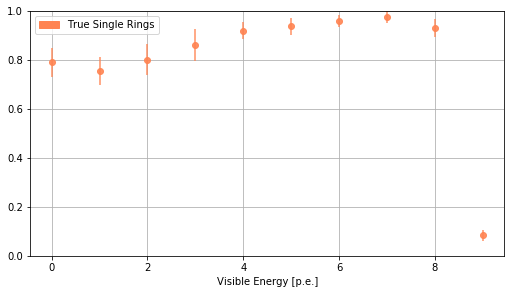

In [37]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,10)

axs=plt.errorbar(x, VisiblePMTEnergySR_Acc,errorVisiblePMTEnergySR,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Single Rings')
plt.legend(handles=[blue_patch],loc='best')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000")
          # Get locations and labels
matplotlib.pyplot.xticks(np.arange(len(VisiblePMTEnergy_AccMR)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs  Visible Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [38]:
VisibleLAPPDEnergySR=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if Y[100000+event,0] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        VisibleLAPPDEnergySR.append((float(VisibleE[100000+event,1]),feature_maps[event,0]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

VisibleLAPPDEnergySR=np.array(VisibleLAPPDEnergySR)

In [39]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = 0
Bin200 =0
Bin300 =0
Bin400 =0
Bin500 =0
Bin600 =0
Bin700 =0
Bin800 =0
Bin900 =0
Bin1000=0
Bin1500=0
Bin2000=0
Bin3000=0
Bin4000=0
Bin8000=0

#Range PionEn
for event in range(len(VisibleLAPPDEnergySR)):

    if VisibleLAPPDEnergySR[event,0]<=100 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin100 = Bin100+1
    if VisibleLAPPDEnergySR[event,0]<=100:
         pi1=pi1+1
        
    if 100<=VisibleLAPPDEnergySR[event,0]<=200 and VisibleLAPPDEnergySR[event,1]>0.5:
         Bin200 = Bin200+1
    if 100<=VisibleLAPPDEnergySR[event,0]<=200:
         pi2=pi2+1
        
    if 200<=VisibleLAPPDEnergySR[event,0]<=300 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin300 = Bin300+1
    if 200<=VisibleLAPPDEnergySR[event,0]<=300:
        pi3=pi3+1
  
    if 300<=VisibleLAPPDEnergySR[event,0]<=400 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=VisibleLAPPDEnergySR[event,0]<=400:
        pi4=pi4+1
        
    if 400<=VisibleLAPPDEnergySR[event,0]<=800 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=VisibleLAPPDEnergySR[event,0]<=800:
        pi5=pi5+1
        
    if 800<=VisibleLAPPDEnergySR[event,0]<=1200 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin600 = Bin600+1
    if 800<=VisibleLAPPDEnergySR[event,0]<=1200:
        pi6=pi6+1
        
    if 1200<=VisibleLAPPDEnergySR[event,0]<=1800 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=VisibleLAPPDEnergySR[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=VisibleLAPPDEnergySR[event,0]<=2500 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=VisibleLAPPDEnergySR[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=VisibleLAPPDEnergySR[event,0]<=5000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=VisibleLAPPDEnergySR[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=VisibleLAPPDEnergySR[event,0]<=10000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=VisibleLAPPDEnergySR[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=VisibleLAPPDEnergySR[event,0]<=15000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=VisibleLAPPDEnergySR[event,0]<=15000:
        pi11=pi11+1

    if 15000<=VisibleLAPPDEnergySR[event,0]<=20000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=VisibleLAPPDEnergySR[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=VisibleLAPPDEnergySR[event,0]<=80000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=VisibleLAPPDEnergySR[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=VisibleLAPPDEnergySR[event,0]<=4000 and VisibleLAPPDEnergySR[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=VisibleLAPPDEnergySR[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=VisibleLAPPDEnergySR[event,0]<=8000 and VisibleLAPPDEnergySR[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=VisibleLAPPDEnergySR[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5,) 

VisibleLAPPDEnergySR_Acc=[Bin100/pi1,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5]
VisibleLAPPDEnergySR_AccError=(1/sqrt(pi1),1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5))

errorVisibleLAPPDEnergySR=[]
for i in range(5):
    errorVisibleLAPPDEnergySR.append(VisibleLAPPDEnergySR_AccError[i]* VisibleLAPPDEnergySR_Acc[i])

     

3354 2236 430 96 21


In [40]:
print(len(VisiblePMTEnergy_AccMR),len(errorVisiblePMTEnergyMR),len(x))

12 12 10


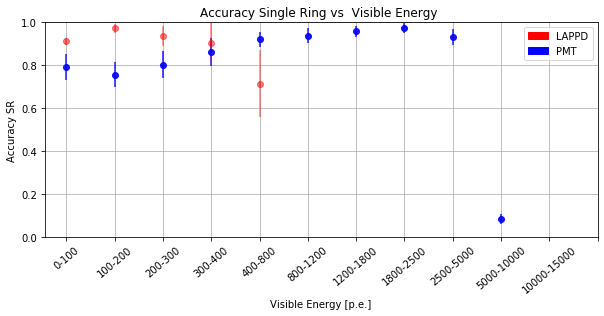

In [41]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,10)
x1=range(0,5)
axs=plt.errorbar(x, VisiblePMTEnergySR_Acc,errorVisiblePMTEnergySR,c='blue', fmt='o',alpha=0.9) 
axs=plt.errorbar(x1, VisibleLAPPDEnergySR_Acc,errorVisibleLAPPDEnergySR,c='red', fmt='o',alpha=0.5) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color='blue', label='PMT ')
red_patch = mpatches.Patch(color='red', label='LAPPD')
plt.legend(handles=[red_patch,blue_patch],loc='best')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000")
          # Get locations and labels
plt.xticks(np.arange(len(VisiblePMTEnergy_AccMR)), labels, rotation='40')
plt.tick_params(axis='both',length=4)
# naming the y axis 
plt.ylabel('Accuracy SR') 
  
# giving a title to my graph 
plt.title('Accuracy Single Ring vs  Visible Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

ValueError: shape mismatch: objects cannot be broadcast to a single shape

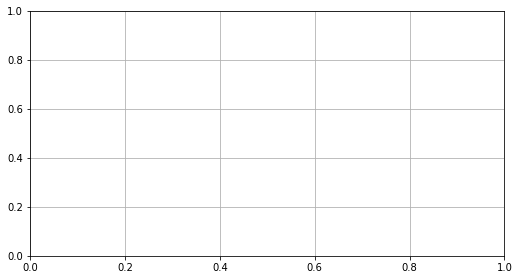

In [42]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,13)
x1=range(0,10)
axs=plt.errorbar(x, VisiblePMTEnergySR_Acc,errorVisiblePMTEnergySR,c=colorMR, fmt='o',alpha=0.9) 
axs=plt.errorbar(x1, VisiblePMTEnergy_AccMR,errorVisiblePMTEnergyMR,c=colorSR, fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=colorSR, label='True Muon Event ')
red_patch = mpatches.Patch(color=colorMR, label='True Electron Event')
plt.legend(handles=[red_patch,blue_patch],loc='center')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
plt.xticks(np.arange(len(VisiblePMTEnergySR_Acc)), labels, rotation='40')
plt.tick_params(axis='both',length=4)
# naming the y axis 
plt.ylabel('Accuracy ') 
  
# giving a title to my graph 
plt.title('Accuracy vs Visible Energy \n (PMT) ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

# Neutrino Energy

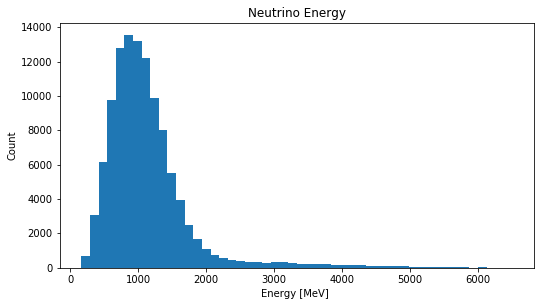

In [43]:


plt.hist(NeutrinoEnergy, bins=50,histtype='stepfilled')
plt.title("Neutrino Energy")
plt.xlabel("Energy [MeV] ")
plt.ylabel("Count")
plt.grid(False)
plt.show()

In [44]:
EnerglisteSR=[]
RightEventsSR=[]
EnerglisteMR=[]
RightEventsMR=[]
for event in range(len(feature_maps)):
    if Y[100000+event,0]>0.5 and feature_maps[event,0]>0.5:
        RightEventsSR.append(feature_maps[event,0])
        EnerglisteSR.append(NeutrinoEnergy[100000+event])
    if Y[100000+event,1]>0.5 and feature_maps[event,1]>0.5:
        RightEventsMR.append(feature_maps[event,0])
        EnerglisteMR.append(NeutrinoEnergy[100000+event])

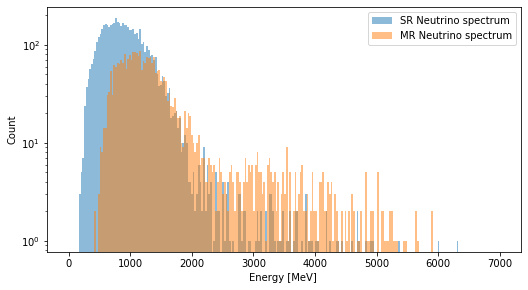

In [45]:
plt.hist(EnerglisteSR, range=(0,7000), bins=250, alpha=0.5,log=True, label='SR Neutrino spectrum')
plt.hist(EnerglisteMR, range=(0,7000), bins=250, alpha=0.5,log=True, label='MR Neutrino spectrum')
plt.legend(loc='upper right')
plt.xlabel("Energy [MeV] ")
plt.ylabel("Count")
plt.show()

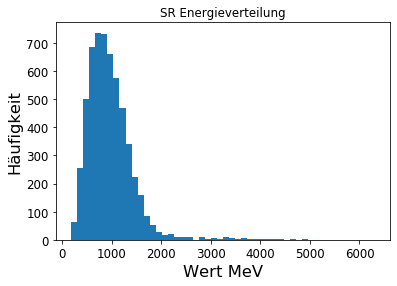

In [33]:
plt.hist(EnerglisteSR, bins=50)
plt.title("SR Energieverteilung")
plt.xlabel("Wert MeV")
plt.ylabel("Häufigkeit")
plt.show()

# True Parent Energy 

In [46]:
YTest=Y[100000:]

In [47]:
TruePMTEnergySR=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if YTest[event,0] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        TruePMTEnergySR.append((float(NeutrinoEnergy[event]),feature_maps[event,0]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

TruePMTEnergySR=np.array(TruePMTEnergySR)

In [48]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(TruePMTEnergySR)):

    if TruePMTEnergySR[event,0]<=100 and TruePMTEnergySR[event,1]>0.5:
        Bin100 = Bin100+1
    if TruePMTEnergySR[event,0]<=100:
         pi1=pi1+1
        
    if 100<=TruePMTEnergySR[event,0]<=200 and TruePMTEnergySR[event,1]>0.5:
         Bin200 = Bin200+1
    if 100<=TruePMTEnergySR[event,0]<=200:
         pi2=pi2+1
        
    if 200<=TruePMTEnergySR[event,0]<=300 and TruePMTEnergySR[event,1]>0.5:
        Bin300 = Bin300+1
    if 200<=TruePMTEnergySR[event,0]<=300:
        pi3=pi3+1
  
    if 300<=TruePMTEnergySR[event,0]<=400 and TruePMTEnergySR[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=TruePMTEnergySR[event,0]<=400:
        pi4=pi4+1
        
    if 400<=TruePMTEnergySR[event,0]<=800 and TruePMTEnergySR[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=TruePMTEnergySR[event,0]<=800:
        pi5=pi5+1
        
    if 800<=TruePMTEnergySR[event,0]<=1200 and TruePMTEnergySR[event,1]>0.5:
        Bin600 = Bin600+1
    if 800<=TruePMTEnergySR[event,0]<=1200:
        pi6=pi6+1
        
    if 1200<=TruePMTEnergySR[event,0]<=1800 and TruePMTEnergySR[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=TruePMTEnergySR[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=TruePMTEnergySR[event,0]<=2500 and TruePMTEnergySR[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=TruePMTEnergySR[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=TruePMTEnergySR[event,0]<=5000 and TruePMTEnergySR[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=TruePMTEnergySR[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=TruePMTEnergySR[event,0]<=10000 and TruePMTEnergySR[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=TruePMTEnergySR[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=TruePMTEnergySR[event,0]<=15000 and TruePMTEnergySR[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=TruePMTEnergySR[event,0]<=15000:
        pi11=pi11+1

    if 15000<=TruePMTEnergySR[event,0]<=20000 and TruePMTEnergySR[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=TruePMTEnergySR[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=TruePMTEnergySR[event,0]<=80000 and TruePMTEnergySR[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=TruePMTEnergySR[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=TruePMTEnergySR[event,0]<=4000 and TruePMTEnergySR[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=TruePMTEnergySR[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=TruePMTEnergySR[event,0]<=8000 and TruePMTEnergySR[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=TruePMTEnergySR[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8, pi9, pi10,11, pi11, pi12, pi13, pi14, pi15) 

TruePMTEnergySR_Acc=[Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6,Bin700/pi7,Bin800/pi8,Bin900/pi9,Bin1000/pi10]#,Bin1500/pi11]
TruePMTEnergySR_AccError=(1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6),1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9),1/sqrt(pi10))#,1/sqrt(pi11))

errorTruePMTEnergySR=[]
for i in range(9):
    errorTruePMTEnergySR.append(TruePMTEnergySR_AccError[i]* TruePMTEnergySR_Acc[i])

     

0 5 42 138 1649 2205 1533 264 250 19 11 0 0 0 0 0


12 13


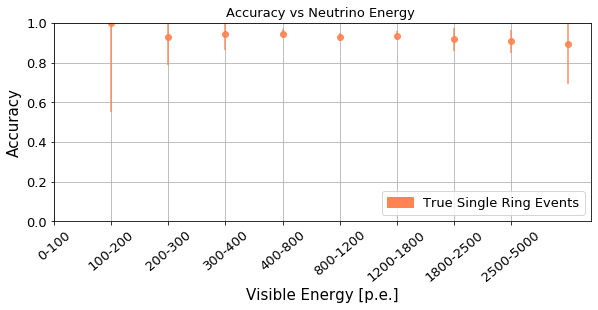

In [73]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(1,10)

axs=plt.errorbar(x, TruePMTEnergySR_Acc,errorTruePMTEnergySR,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Single Ring Events')
plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
print(len(VisiblePMTEnergy_AccMR),len(labels))
plt.xticks(np.arange(len(TruePMTEnergySR_Acc)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs Neutrino Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [49]:
TruePMTEnergyMR=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if YTest[event,1] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        TruePMTEnergyMR.append((float(NeutrinoEnergy[event]),feature_maps[event,1]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

TruePMTEnergyMR=np.array(TruePMTEnergyMR)

In [50]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(TruePMTEnergyMR)):

    if TruePMTEnergyMR[event,0]<=100 and TruePMTEnergyMR[event,1]>0.5:
        Bin100 = Bin100+1
    if TruePMTEnergyMR[event,0]<=100:
         pi1=pi1+1
        
    if 100<=TruePMTEnergyMR[event,0]<=200 and TruePMTEnergyMR[event,1]>0.5:
         Bin200 = Bin200+1
    if 100<=TruePMTEnergyMR[event,0]<=200:
         pi2=pi2+1
        
    if 200<=TruePMTEnergyMR[event,0]<=300 and TruePMTEnergyMR[event,1]>0.5:
        Bin300 = Bin300+1
    if 200<=TruePMTEnergyMR[event,0]<=300:
        pi3=pi3+1
  
    if 300<=TruePMTEnergyMR[event,0]<=400 and TruePMTEnergyMR[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=TruePMTEnergyMR[event,0]<=400:
        pi4=pi4+1
        
    if 400<=TruePMTEnergyMR[event,0]<=800 and TruePMTEnergyMR[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=TruePMTEnergyMR[event,0]<=800:
        pi5=pi5+1
        
    if 800<=TruePMTEnergyMR[event,0]<=1200 and TruePMTEnergyMR[event,1]>0.5:
        Bin600 = Bin600+1
    if 800<=TruePMTEnergyMR[event,0]<=1200:
        pi6=pi6+1
        
    if 1200<=TruePMTEnergyMR[event,0]<=1800 and TruePMTEnergyMR[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=TruePMTEnergyMR[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=TruePMTEnergyMR[event,0]<=2500 and TruePMTEnergyMR[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=TruePMTEnergyMR[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=TruePMTEnergyMR[event,0]<=5000 and TruePMTEnergyMR[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=TruePMTEnergyMR[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=TruePMTEnergyMR[event,0]<=10000 and TruePMTEnergyMR[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=TruePMTEnergyMR[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=TruePMTEnergyMR[event,0]<=15000 and TruePMTEnergyMR[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=TruePMTEnergyMR[event,0]<=15000:
        pi11=pi11+1

    if 15000<=TruePMTEnergyMR[event,0]<=20000 and TruePMTEnergyMR[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=TruePMTEnergyMR[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=TruePMTEnergyMR[event,0]<=80000 and TruePMTEnergyMR[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=TruePMTEnergyMR[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=TruePMTEnergyMR[event,0]<=4000 and TruePMTEnergyMR[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=TruePMTEnergyMR[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=TruePMTEnergyMR[event,0]<=8000 and TruePMTEnergyMR[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=TruePMTEnergyMR[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8, pi9, pi10, pi11, pi12, pi13, pi14, pi15) 

TruePMTEnergyMR_Acc=[0,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6,Bin700/pi7,Bin800/pi8,Bin900/pi9,Bin1000/pi10]
TruePMTEnergyMR_AccError=(0,1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6),1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9),1/sqrt(pi10))

errorTruePMTEnergyMR=[]
for i in range(10):
    errorTruePMTEnergyMR.append(TruePMTEnergyMR_AccError[i]* TruePMTEnergyMR_Acc[i])

     

0 3 30 89 1142 1634 1080 180 168 10 0 0 0 0 0


In [51]:
x.shape

AttributeError: 'range' object has no attribute 'shape'

In [52]:
TruePMTEnergyMR_Acc[1:]

[0.6666666666666666,
 0.7666666666666667,
 0.7191011235955056,
 0.6742556917688266,
 0.6854345165238678,
 0.6824074074074075,
 0.6833333333333333,
 0.6845238095238095,
 0.7]

12 13


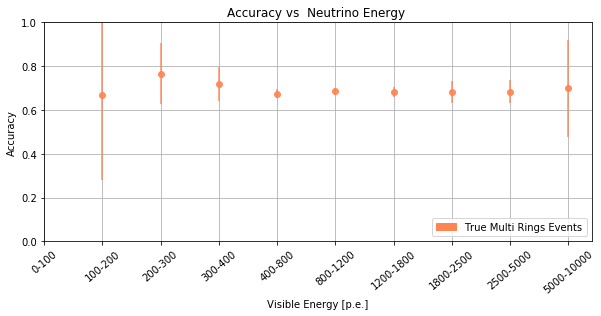

In [53]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(1,10)

axs=plt.errorbar(x, TruePMTEnergyMR_Acc[1:],errorTruePMTEnergyMR[1:],c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Multi Rings Events')
plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
print(len(VisiblePMTEnergy_AccMR),len(labels))
plt.xticks(np.arange(len(TruePMTEnergyMR_Acc)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs  Neutrino Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [81]:
TruePMTEnergySR_Acc.shape,errorTruePMTEnergySR.shape,TruePMTEnergyMR_Acc.shape,errorTruePMTEnergyMR.shape

AttributeError: 'list' object has no attribute 'shape'

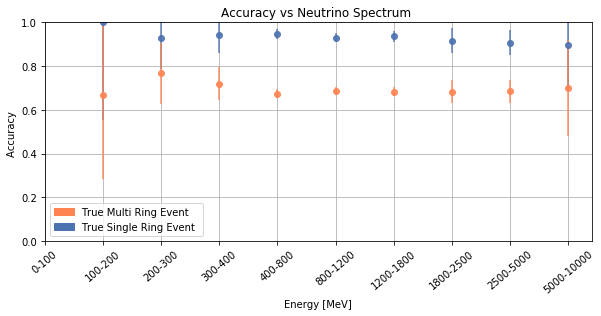

In [54]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(1,10)
x1=range(1,10)
axs=plt.errorbar(x, TruePMTEnergySR_Acc,errorTruePMTEnergySR,c=colorSR, fmt='o',alpha=0.9) 
axs=plt.errorbar(x1,TruePMTEnergyMR_Acc[1:],errorTruePMTEnergyMR[1:],c=colorMR, fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=colorSR, label='True Single Ring Event ')
red_patch = mpatches.Patch(color=colorMR, label='True Multi Ring Event')
plt.legend(handles=[red_patch,blue_patch],loc='best')

#plt.legend()
# naming the x axis 
plt.xlabel('Energy [MeV]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
plt.xticks(np.arange(len(TruePMTEnergyMR_Acc)), labels, rotation='40')
plt.tick_params(axis='both',length=4)
# naming the y axis 
plt.ylabel('Accuracy ') 
  
# giving a title to my graph 
plt.title('Accuracy vs Neutrino Spectrum ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

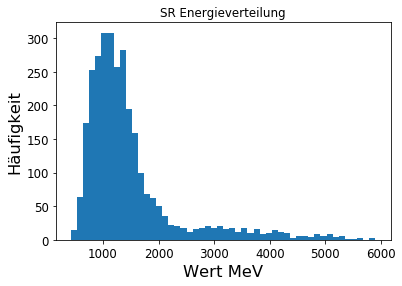

In [34]:
plt.hist(EnerglisteMR, bins=50)
plt.title("SR Energieverteilung")
plt.xlabel("Wert MeV")
plt.ylabel("Häufigkeit")
plt.show()

In [32]:
plt.scatter(EnerglisteSR,RightEventsSR,s=area,log=True  alpha=0.5)#
#ax.title('Single Ring Prediction vs Energy')
plt.ylabel('Single Ring Probability')
plt.xlabel('Energy [MeV]')

plt.show()

SyntaxError: invalid syntax (<ipython-input-32-9e86fe9b1164>, line 1)

In [ ]:
plt.scatter(RightEventsSR,EnerglisteSR,s=area,  alpha=0.5)#
#ax.title('Single Ring Prediction vs Energy')
plt.xlabel('Multi Ring Probability')
plt.ylabel('Energy')

plt.show()

# 1 Dim Prediction 


## Last Layer

In [18]:
model = tf.keras.models.load_model("Testmodel RC 5x5 0.83acc.model")



In [9]:
feature_maps = model.predict(X[100000:])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


NameError: name 'class_names' is not defined

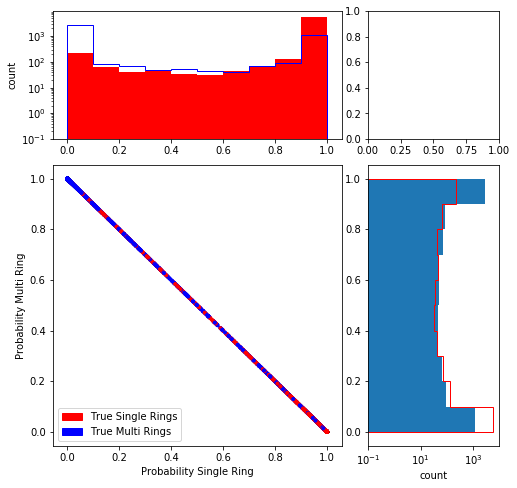

In [10]:

colors = y0colors = ['red' if value[0] > value[1] else 'blue' for value in Y[100000:]]#(1,0)
area = np.pi

x = feature_maps[:,0]
x1=[]
x2=[]
for value in range(len(x)):
    if Y[100000+value,0] > Y[100000+value,1]:
        x1.append(x[value])
        x2.append(1-x[value])
    
y = feature_maps[:,1]
y1=[]
y2=[]
for value in range(len(y)):
    if Y[100000+value,0] < Y[100000+value,1]:
        y1.append(y[value])
        y2.append(1-y[value])

fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
tommy = plt.subplot(gs[0,2])


ax_main.scatter(x,y,marker='.', color=colors)
ax_main.set(xlabel="Probability Single Ring", ylabel="Probability Multi Ring")
red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='lower left')


ax_xDist.hist(x1 ,bins=10,align='mid', color='red',histtype='stepfilled', log=True)
ax_xDist.hist(y2,bins=10,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set(ylabel='count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(y1,bins=10,orientation='horizontal',align='mid',histtype='stepfilled',log=True )
ax_yDist.hist(x2,bins=10,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='count')
#ax_yCumDist = ax_yDist.twiny()
#ax_yCumDist.hist(y,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid',orientation='horizontal')
#ax_yCumDist.tick_params('x', colors='r')
#ax_yCumDist.set_xlabel('Multiring',color='blue')

tommy.draw(plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion Matrix'))
#tightfig()
plt.show()

In [ ]:



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',proj_type = 'ortho')

colors = y0colors = ['red' if value > 0.5 else 'blue' for value in ThreeDPlot[:,3]]#(0,0,0)
area = np.pi*1

# Plot
ax.scatter(ThreeDPlot[:,0],ThreeDPlot[:,1],ThreeDPlot[:,2],c=colors, 
           s=area,alpha=0.5)
             
           #
#ax.title('Single Ring Prediction vs Energy')
ax.set_xlabel('Neutron Number', labelpad=15)
ax.set_ylabel('(MR, SR, ALL)',labelpad=15)
ax.set_zlabel('Neutrino Energy',labelpad=15)
ax.set_xlim(0, 9,1)
ax.set_zlim(0, 7000)
ax.set_zlim3d(zmin=0)
ax.set_xlim3d(xmax =10)
plt.locator_params(axis='x', nbins=10,labelleft=35,labelrotation =40)

ax.view_init(0, -92)

a=ax.get_xticks().tolist()
ax.xaxis.set_ticklabels(a)
ax.yaxis.set_ticklabels([])
#ax.zaxis.set_ticklabels([])




plt.draw()

    
#plt.show()

In [ ]:
colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[:,0]]
area = np.pi*2
fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)


ax_main.scatter(NeutronNumber[:],NeutrinoEnergy[:],s=area, c=colors, alpha=0.1)#
ax_main.set(xlabel="Neutron Number", ylabel="Neutrino Energy [MeV]")
#ax.title('Single Ring Prediction vs Energy')


red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='upper right')


ax_xDist.hist(NeutronNumber[:] ,bins=8, align='mid', color='green',histtype='stepfilled',fill=False, log=True)
#ax_xDist.hist(y2,bins=10,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set(ylabel='Count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(NeutrinoEnergy[:],bins=100,orientation='horizontal',color='black', align='mid',fill=False,histtype='stepfilled',log=True )
#ax_yDist.hist(x2,bins=10,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='Count')


plt.tight_layout()
plt.show()

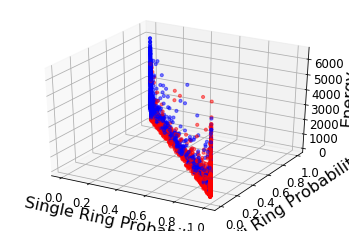

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[100000:,0]]#(0,0,0)
area = np.pi*3

# Plot
ax.scatter(feature_maps[:,0],feature_maps[:,1],NeutrinoEnergy[100000:],s=area,c=colors,   alpha=0.5)#
#ax.title('Single Ring Prediction vs Energy')
ax.set_xlabel('Single Ring Probability')
ax.set_ylabel('Multi Ring Probability')
ax.set_zlabel('Energy')
plt.show()

# Neutron Distribution

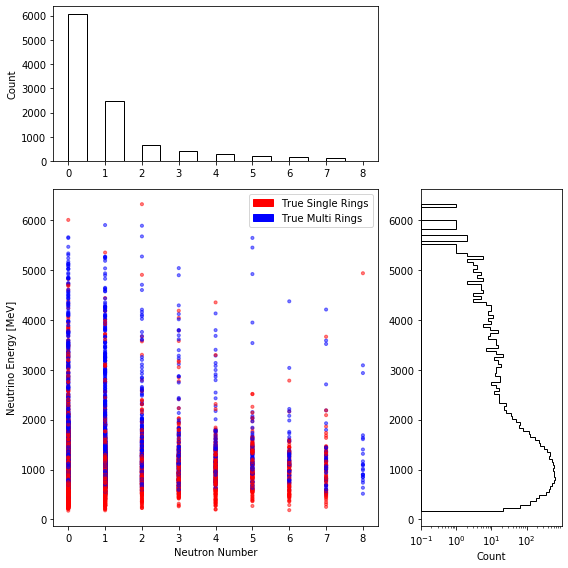

In [22]:
colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[100000:,0]]
area = np.pi*3
fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)


ax_main.scatter(NeutronNumber[100000:],NeutrinoEnergy[100000:],s=area, c=colors, alpha=0.5)#
ax_main.set(xlabel="Neutron Number", ylabel="Neutrino Energy [MeV]")
#ax.title('Single Ring Prediction vs Energy')


red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='upper right')


ax_xDist.hist(NeutronNumber[100000:] ,bins=16, align='mid', color='green',histtype='stepfilled',fill=False, log=False)
#ax_xDist.hist(y2,bins=10,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set_ylabel('Count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(NeutrinoEnergy[100000:],bins=100,orientation='horizontal',color='black', align='mid',fill=False,histtype='stepfilled',log=True )
#ax_yDist.hist(x2,bins=10,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='Count')


plt.tight_layout()
plt.show()

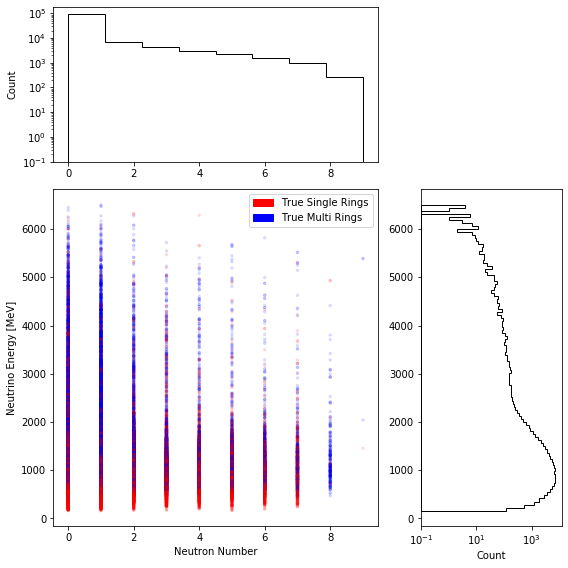

In [23]:
colors = y0colors = ['red' if value > 0.5 else 'blue' for value in Y[:,0]]
area = np.pi*2
fig = plt.figure(figsize=(8,8))
plt.title('Ring Counting 83% acc on testset with 20k events')
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)


ax_main.scatter(NeutronNumber[:],NeutrinoEnergy[:],s=area, c=colors, alpha=0.1)#
ax_main.set(xlabel="Neutron Number", ylabel="Neutrino Energy [MeV]")
#ax.title('Single Ring Prediction vs Energy')


red_patch = mpatches.Patch(color='red', label='True Single Rings')
blue_patch = mpatches.Patch(color='blue', label='True Multi Rings')
ax_main.legend(handles=[red_patch, blue_patch],loc='upper right')


ax_xDist.hist(NeutronNumber[:] ,bins=8, align='mid', color='green',histtype='stepfilled',fill=False, log=True)
#ax_xDist.hist(y2,bins=10,histtype='step',normed=False,color='blue',align='mid',log=True)
ax_xDist.set(ylabel='Count')
#ax_xDist.text(1, 1, 'Test', #style='italic',bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
#ax_xCumDist = ax_xDist.twinx()
#ax_xDist.hist(y1,bins=100,cumulative=False,histtype='step',normed=True,color='blue',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('Singlering',color='r')

ax_yDist.hist(NeutrinoEnergy[:],bins=100,orientation='horizontal',color='black', align='mid',fill=False,histtype='stepfilled',log=True )
#ax_yDist.hist(x2,bins=10,histtype='step',orientation='horizontal',normed=False,color='red',align='mid',log=True)
ax_yDist.set(xlabel='Count')


plt.tight_layout()
plt.show()

In [39]:
###### SingleRinge
ThreeDPlot=[]
for event in range(len(Y)):
    ThreeDPlot.append((NeutronNumber[event],0,NeutrinoEnergy[event],Y[event,0])) #All
    if Y[event,0] >0.5:
        ThreeDPlot.append((NeutronNumber[event],1,NeutrinoEnergy[event],Y[event,0])) #
    if Y[event,1] >0.5:
        ThreeDPlot.append((NeutronNumber[event],2,NeutrinoEnergy[event],Y[event,0]))
ThreeDPlot=np.array(ThreeDPlot)

In [40]:
ThreeDPlot[0,2]

1178.78

In [49]:
plt.rcParams['figure.figsize'] = [17, 12]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The `zmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: labelrotation


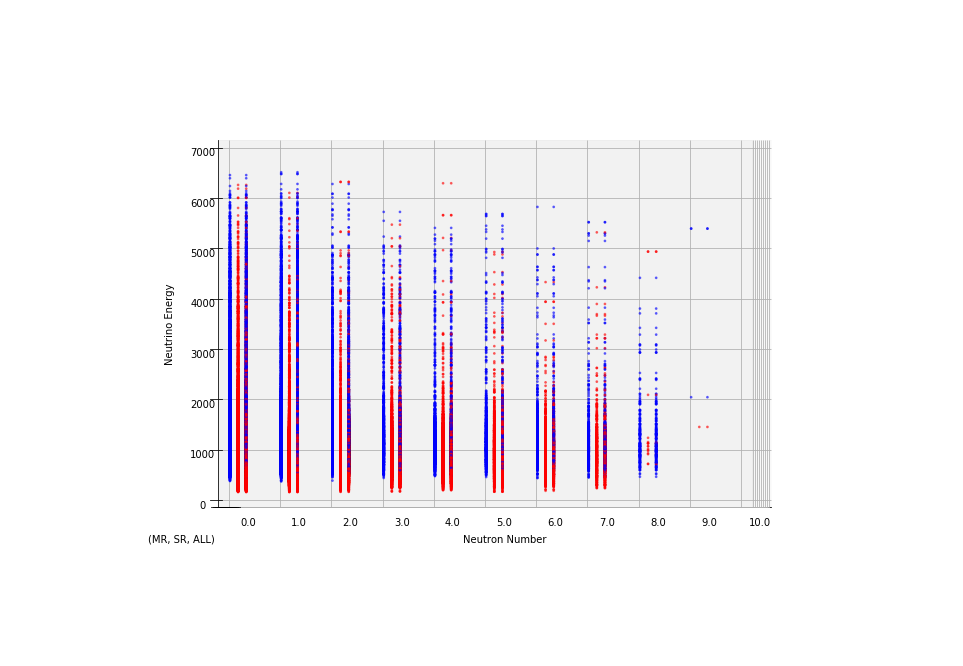

In [82]:



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',proj_type = 'ortho')

colors = y0colors = ['red' if value > 0.5 else 'blue' for value in ThreeDPlot[:,3]]#(0,0,0)
area = np.pi*1

# Plot
ax.scatter(ThreeDPlot[:,0],ThreeDPlot[:,1],ThreeDPlot[:,2],c=colors, 
           s=area,alpha=0.5)
             
           #
#ax.title('Single Ring Prediction vs Energy')
ax.set_xlabel('Neutron Number', labelpad=15)
ax.set_ylabel('(MR, SR, ALL)',labelpad=15)
ax.set_zlabel('Neutrino Energy',labelpad=15)
ax.set_xlim(0, 9,1)
ax.set_zlim(0, 7000)
ax.set_zlim3d(zmin=0)
ax.set_xlim3d(xmax =10)
plt.locator_params(axis='x', nbins=10,labelleft=35,labelrotation =40)

ax.view_init(0, -92)

a=ax.get_xticks().tolist()
ax.xaxis.set_ticklabels(a)
ax.yaxis.set_ticklabels([])
#ax.zaxis.set_ticklabels([])




plt.draw()

    
#plt.show()

# Ausprobieren

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [178]:
plt.rcParams['figure.figsize'] = [17, 9]

In [293]:
Z.shape

(120, 120)

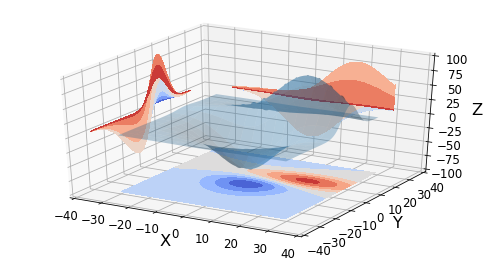

In [295]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-100, 100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [307]:
print(feature_maps[:,1].shape,NeutronNumber[100000:].shape,NeutrinoEnergy[100000:].shape)

(10441,) (10441,) (10441,)


# Seaborn Graph

In [130]:
import seaborn as sns
sns.set(style="white", color_codes=True)

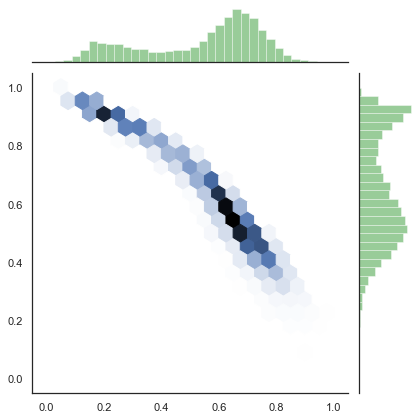

In [131]:
g = sns.jointplot(x=x, y=y, kind="hex", stat_func=None, marginal_kws={'color': 'green'},gridsize=20)

#plt.setp(g.ax_marg_y.patches, color="r")

# Womöglich Denkfehler

In [44]:
p=0
liste=[]
cut=0.7
cut2=0.7
for event in range(len(y)):
    if x[event]>cut and y[event]<cut:
        p=p+1
        liste.append(event)
#print(len(x),len(liste))

wrongliste=[]
trueliste=[]
for event in liste:
    if Y[100000+event,0]<0.5:
        wrongliste.append(event)
    else:
        trueliste.append(event)
print("Anzahl an Events überhalb 70% Wahrschinlichkeit für Singlering: {} \n".format(len(liste)),"Verschmutzung: {} \n".format( len(wrongliste)),"Prozentualer korrekter Anteil: ",round((len(liste)-len(wrongliste))*100/len(liste),2),"%")

#p=0
liste2=[]

for event in range(len(y)):
    if y[event]>cut2 and x[event]<cut2:
        #p=p+1
        liste2.append(event)
#print(len(x),len(liste))

wrongliste2=[]
trueliste2=[]
for event in liste2:
    if Y[100000+event,1]<0.5:
        wrongliste2.append(event)
    else:
        trueliste2.append(event)
print("\n \n")
print("Anzahl an Events überhalb 70% Wahrschinlichkeit für Multiringe: {} \n".format(len(liste2)),"Verschmutzung: {} \n".format( len(wrongliste2)),"Prozentualer korrekter Anteil: ",round((len(liste2)-len(wrongliste2))*100/len(liste2),2),"%")

print("\n \n")
print("Verlorene Events: ", len(x)-(len(liste)+len(liste2)))
print("Prozentualer Anteil (Verlust an Events): ", round((len(x)-(len(liste)+len(liste2)))*100/len(x),2),"%")

Anzahl an Events überhalb 70% Wahrschinlichkeit für Singlering: 2473 
 Verschmutzung: 244 
 Prozentualer korrekter Anteil:  90.13 %

 

Anzahl an Events überhalb 70% Wahrschinlichkeit für Multiringe: 3867 
 Verschmutzung: 664 
 Prozentualer korrekter Anteil:  82.83 %

 

Verlorene Events:  4101
Prozentualer Anteil (Verlust an Events):  39.28 %


In [78]:
Schnitt = np.arange(0.5 ,1, 0.05)

SRPKA = []
MRPKA = []
for cut in Schnitt:
    
    print( "Selected Cut: ", round(cut,2))
    liste=[]
    liste2=[]
    for event in range(len(x1)):
        if x1[event] > round(cut,2):# and y[event] < round(cut,2):
            liste.append(event)
    for event in range(len(y1)):      
        if y1[event] > round(cut,2):# and x[event] < round(cut,2):
            liste2.append(event)
    #print(len(x),len(liste))

    wrongliste=[]
    trueliste=[]
    
    
    
    for event in y2:
        if event > round(cut,2):
            wrongliste.append(event)
        else:
            trueliste.append(event)
            
    SRPKA.append(round((len(liste)-len(wrongliste))/len(liste),2))
    print("Anzahl an Events überhalb {}% Wahrschinlichkeit für Singlering: {} \n".format(round(cut*100,2) ,len(liste)),"Verschmutzung: {} \n".format( len(wrongliste)),"Prozentualer korrekter Anteil: ",round((len(liste)-len(wrongliste))*100/len(liste),2),"%")


    wrongliste2=[]
    trueliste2=[]
    for event in x2:
        if event > round(cut,2):
            wrongliste2.append(event)
        else:
            trueliste2.append(event)
            
    MRPKA.append(round((len(liste2)-len(wrongliste2))/len(liste),2))
    
    print("\n ")
    print("Anzahl an Events überhalb {}% Wahrschinlichkeit für Multiringe: {} \n".format(round(cut*100,2),len(liste2)),"Verschmutzung: {} \n".format( len(wrongliste2)),"Prozentualer korrekter Anteil: ",round((len(liste2)-len(wrongliste2))*100/len(liste2),2),"%")

    print("\n")
    print("Verlorene Events: ", len(x)-(len(liste)+len(liste2)))
    print("Prozentualer Anteil (Verlust an Events): ", round((len(x)-(len(liste)+len(liste2)))*100/len(x),2),"%")
    print("Übrig gebliebene Events: ",len(liste)+len(liste2) )
    print("Prozentualer Anteil (Noch Übrig): ", round((len(liste)+len(liste2))*100/len(x),2),"%")
    
    print("----------------------------------------","\n \n \n \n ","----------------------------------------")

Selected Cut:  0.5
Anzahl an Events überhalb 50.0% Wahrschinlichkeit für Singlering: 5706 
 Verschmutzung: 1375 
 Prozentualer korrekter Anteil:  75.9 %

 
Anzahl an Events überhalb 50.0% Wahrschinlichkeit für Multiringe: 2961 
 Verschmutzung: 399 
 Prozentualer korrekter Anteil:  86.52 %


Verlorene Events:  1774
Prozentualer Anteil (Verlust an Events):  16.99 %
Übrig gebliebene Events:  8667
Prozentualer Anteil (Noch Übrig):  83.01 %
---------------------------------------- 
 
 
 
  ----------------------------------------
Selected Cut:  0.55
Anzahl an Events überhalb 55.0% Wahrschinlichkeit für Singlering: 5690 
 Verschmutzung: 1345 
 Prozentualer korrekter Anteil:  76.36 %

 
Anzahl an Events überhalb 55.0% Wahrschinlichkeit für Multiringe: 2932 
 Verschmutzung: 382 
 Prozentualer korrekter Anteil:  86.97 %


Verlorene Events:  1819
Prozentualer Anteil (Verlust an Events):  17.42 %
Übrig gebliebene Events:  8622
Prozentualer Anteil (Noch Übrig):  82.58 %
---------------------------